<a href="https://www.kaggle.com/code/bmart80/bank-churn-dataset-votingclassifier?scriptVersionId=159534765" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #F38080;
            overflow:hidden;
            font-weight:500"> BANK CHURN PREDICTION</div>

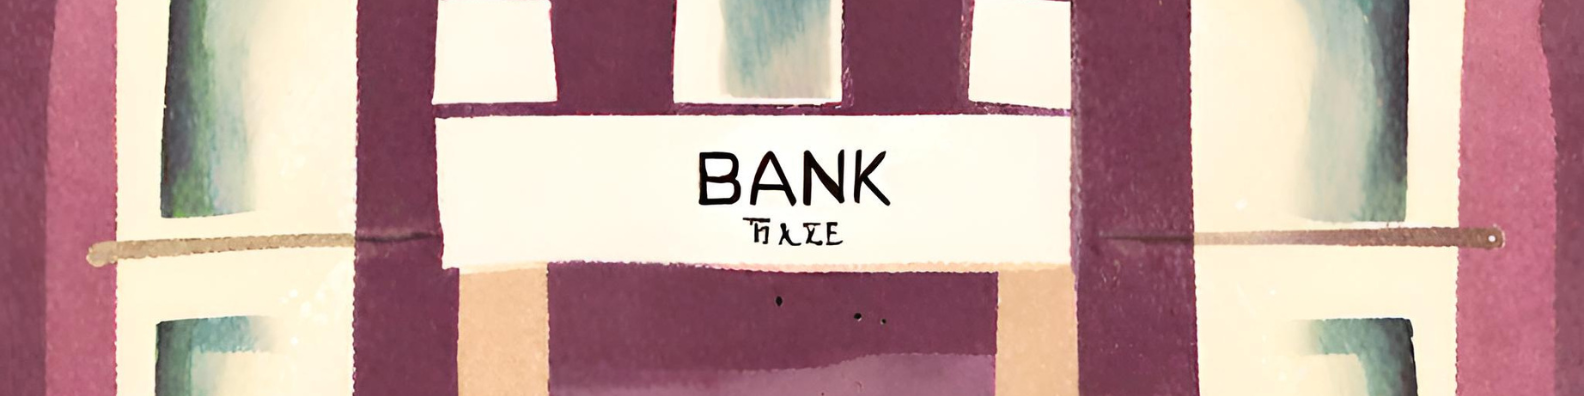

  <div style="padding:20px; 
              color:blue;
              margin:10px;
              font-size:150%;
              text-align:center;
              display:fill;
              border-radius:20px;
              border-width: 5px;
              background-color:#CCFF99;
              overflow:hidden;
              font-weight:500">
    <b>INTRODUCTION</b>
  </div>

This notebook has been created as part of the **Binary Classification with a Bank Churn Dataset** competition from **Kaggle**.

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Bank Customer Churn Prediction dataset. Feature distributions are close to, but not exactly the same, as the original.

Files
train.csv - the training dataset; Exited is the binary target
test.csv - the test dataset; your objective is to predict the probability of Exited
sample_submission.csv - a sample submission file in the correct format

# **DATASET**

**train.csv** 

- `CustomerId`: A unique identifier for each customer

- `Surname`: The customer's surname or last name

- `CreditScore`: A numerical value representing the customer's credit score

- `Geography`: The country where the customer resides (France, Spain or Germany)

- `Gender`: The customer's gender (Male or Female)

- `Age`: The customer's age.

- `Tenure`: The number of years the customer has been with the bank

- `Balance`: The customer's account balance

- `NumOfProducts`: The number of bank products the customer uses (e.g., savings account, credit card)

- `HasCrCard`: Whether the customer has a credit card (1 = yes, 0 = no)

- `IsActiveMember`: Whether the customer is an active member (1 = yes, 0 = no)

- `EstimatedSalary`: The estimated salary of the customer

- `Exited`: Whether the customer has churned (1 = yes, 0 = no)


**test.csv** 

**sample_submission.csv** - A submission file in the correct format. See the Evaluation page for details.

  <div style="padding:20px; 
              color:blue;
              margin:10px;
              font-size:150%;
              text-align:center;
              display:fill;
              border-radius:20px;
              border-width: 5px;
              background-color:#CCFF99;
              overflow:hidden;
              font-weight:500">
    <b>EXECUTIVE SUMMARY</b>
</div>

The dataset used for this project contains around 165'000 values with few duplicates and no missing data, which makes it easy to handle. Three features (`id`, `Surname`, `CustomerId`) have been considered as irrelevant, as they only contain unique values in each column and no correlation can be found with the target feature (`Exited`)

Only the credit score and the age of the people show outliers, mainly people with low credit score and people older than 60. It is also interesting that around half of the people do not have money (Balance) in their account, which makes the distribution unbalanced, also considering that only **21 % of the people has churned**. This has required some feature engineering and preprocessing. 

The group that tends to churn more are people from germany, non active members, women, people with more than 2 products and older people. For the geographical and gender feature it was decided to create an additional feature combining both, which has increased the correlation with the target, especially considering that the highest pearson correlation can be seen in the age (0.34) and it is not very high. However the **age, number of products and active membership has remain as the most important features for the models**.

For the models, an **AUC of 0.89** was achieved, combining **CatBoost**, **XGBoost** and **LightGBM**, being this three the ones that alone showed the best performance. 

<u><b>Future Improvements:</b></u>

- Feature extraction ha shown to increase the correlation with the churn. Adding additional featured can be explored

- Adding more data of people who churned can be also helpful as oversampling would oly overfit the model adding duplicated features and undersampling would reduce the data to 20% of the original data.

- Trying other models or hyperparameter tuning can be also helpful to get better results. However, a GridSearch over LightGBM was carried out and no improvements could be seen. 

- Better analyzing the feature importance using permutancion importance or SHAP

- Eliminating features that can lead to an AUC reduction

  <div style="padding:20px; 
              color:blue;
              margin:10px;
              font-size:150%;
              text-align:center;
              display:fill;
              border-radius:20px;
              border-width: 5px;
              background-color:#CCFF99;
              overflow:hidden;
              font-weight:500">
    <b>CONTACT INFORMATION</b>
  </div>

If you like this project, feel free to copy this notebook an make your own RAG Project. You can also contact me through LinkedIn or follow my GitHub:



  <div style="padding:20px; 
              color:blue;
              margin:10px;
              font-size:150%;
              text-align:center;
              display:fill;
              border-radius:20px;
              border-width: 5px;
              background-color:#CCFF99;
              overflow:hidden;
              font-weight:500">
    <b>TABLE OF CONTENTS</b>
  </div>

* [1. Import Libraries](#lib)

* [2. Data Ingestion](#import)

* [3. Data Cleansing](#clean)

    * [3.1. Drop Columns](#drop)

    * [3.2. Missing Values](#miss)

    * [3.3. Duplicates](#dup)
    
* [4. Exploratory Data Analysis ](#exp)
  
    * [4.1. Distribution Numerical Columns](#dist)
    
    * [4.2. Distribution Categorical Columns](#cat)
    
    * [4.3. Correlation](#corr)
    
    * [4.4. Overall Churn](#churn)
        
    * [4.5. Bivariate Analysis](#biv)
    
        * [4.5.1. Geography vs. Churn](#geo)
        
        * [4.5.2. Gender vs. Churn](#gen)
        
        * [4.5.3. Credit Score vs. Churn](#cret)
        
        * [4.5.4. Age vs. Churn](#ag)
        
        * [4.5.5. Tenure vs. Churn](#ten)
        
        * [4.5.6. Balance vs. Churn](#bal)
        
        * [4.5.7. Number of Products vs. Churn](#num)
        
        * [4.5.8. Has Credit Card vs. Churn](#has)
        
        * [4.5.9. Is Active Member vs. Churn](#act)
        
        * [4.5.10. Estimated Salary vs. Churn](#sal)
    
* [5. Feature Importance](#imp)

    * [5.1. Feature Extraction](#ext)
    
    * [5.2. Features Classification](#class)

        * [5.3.1 Mutual Info Classification](#mut)

        * [5.3.2. Models Classification](#mcl)

* [6. Preprocessing](#prepro)
 
* [7. Modeling](#mod)
    
    * [7.1. Baseline](#base)
    
    * [7.2. GridSearch](#grid)

    * [7.3. Voting Classifier](#vot)
     
* [8. Submission](#sub)

# <font color='289C4E'>1. Import Libraries 📚<font><a class='anchor' id='lib'></a>

In [6]:
# DATA MANIPULATION
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None) # Show all columns of a Pandas DataFrame

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# STATISTICS
from statsmodels.graphics.gofplots import qqplot
# This function plots your sample distribution against a Normal distribution,
# to check whether your sample is normally distributed or not

# PIPELINE AND COLUMNTRANSFORMER
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import set_config; set_config(display="diagram")

# TRAIN/TEST SPLIT
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# SCALERS
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# IMPUTER
from sklearn.impute import SimpleImputer

# ENCODER
from sklearn.preprocessing import OneHotEncoder

# MODELS
from xgboost import XGBClassifier  
from lightgbm import LGBMClassifier 
import lightgbm as lgb
import catboost as cb
from catboost import Pool
from catboost import CatBoostClassifier  
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# METRICS
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectFromModel
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             classification_report, 
                             roc_auc_score, 
                             roc_curve,
                             accuracy_score)

import warnings

warnings.filterwarnings("ignore")

# <font color='289C4E'>2. Data Ingestion 📖<font><a class='anchor' id='import'></a>

**Key Findings** 

The train dataset contains information on bank customers who either left the bank or continue to be a customer (target column `Exited`). There are in total 14 columns, mostly numerical with 3 categorical columns. Some columns like `id`, `CustomerID` or `Surname` do not seem to be relevant for the model predictions. 

In [7]:
# Import train.csv

df = pd.read_csv("../Data/train.csv")
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [8]:
# Dataframe information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
# Statistical values for numerical colunns

df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [10]:
# Statistical values for categorical colunns

df.describe(exclude=np.number).T

,count,unique,top,freq
Surname,165034,2797,Hsia,2456
Geography,165034,3,France,94215
Gender,165034,2,Male,93150


# <font color='289C4E'>3. Data Cleansing 🧹 <font><a class='anchor' id='clean'></a>

**Key Findings** 

- The data  contain just a 123 duplicates out of 165'034 values. 
- No missing values
- Irrevan colums were removed

## <font color='289C4E'>3.1. Drop Columns 🚂<font><a class='anchor' id='drop'></a>

In [11]:
# Drop irrelevant columns
df.drop(columns = ['id', 'Surname', 'CustomerId'], inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## <font color='289C4E'>3.2. Missing Values 💯<font><a class='anchor' id='lib'></a>

In [12]:
# Check missing values

def missing_values_summary(df):
    missing_counts = df.isnull().sum()
    total_count = df.shape[0]  # Total number of rows in the DataFrame

    missing_df = pd.DataFrame({'Column': missing_counts.index, 'Missing Count': missing_counts.values})
    missing_df['Missing Percentage'] = (missing_df['Missing Count'] / total_count) * 100

    return missing_df

missing_values_summary(df)

,Column,Missing Count,Missing Percentage
0,CreditScore,0,0.0
1,Geography,0,0.0
2,Gender,0,0.0
3,Age,0,0.0
4,Tenure,0,0.0
5,Balance,0,0.0
6,NumOfProducts,0,0.0
7,HasCrCard,0,0.0
8,IsActiveMember,0,0.0
9,EstimatedSalary,0,0.0


## <font color='289C4E'>3.3. Duplicates 🤼‍♂️<font><a class='anchor' id='lib'></a>

In [13]:
# Drop duplicated columns

print(f"Number of duplicated rows before = {df.duplicated().sum()}")

df = df.drop_duplicates()

print(f"Number of duplicated rows after = {df.duplicated().sum()}")

Number of duplicated rows before = 123
Number of duplicated rows after = 0


# <font color='289C4E'>4. Exploratory Data Analysis 📊<font><a class='anchor' id='exp'></a>

## <font color='289C4E'>4.1. Distribution Numerical Columns 1️⃣<font><a class='anchor' id='dist'></a>

**Key Findings** 

- <u>Distribution</u>:

    - `CreditScore` `Age`, `EstimatedSalary` show and asymetrical discribution, being `Age` right-skewed and
    the other left-skewed
    - `Balance` shows a great amount of values at 0, meaning no money in the account, and being a second distribution at mean 125'000, which would mean that the distribution of clients with money in the account is symetrical around that mean
    - The other columns have values (integers) between 0 and 1, 0 and 4 or 0 and 10, being `Tenure` the only symetrically distributed
    
    
- <u>Outliers</u>:

    - `CreditScore` and `Age` seem to be the only columns positive kurtosis (how peaked or flat our normal-like) distribution is with outliers, as positive kurtosis have more tendency to produce outliers
    - The target `Exited` seems to be unbalanced with a majority of values in the 0 (not churned)

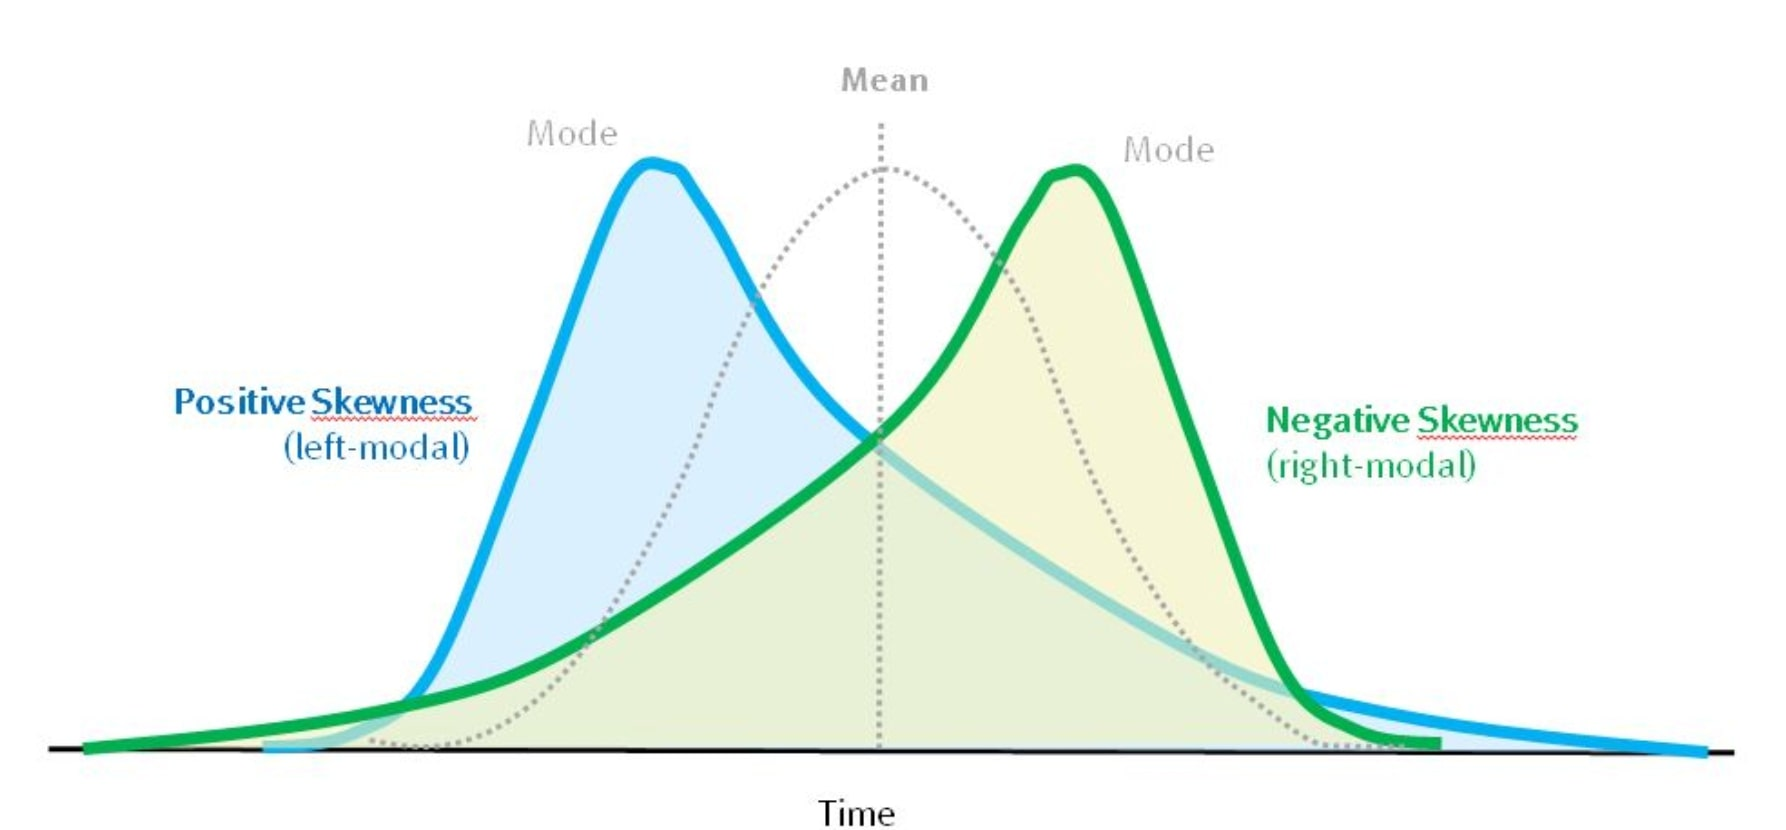

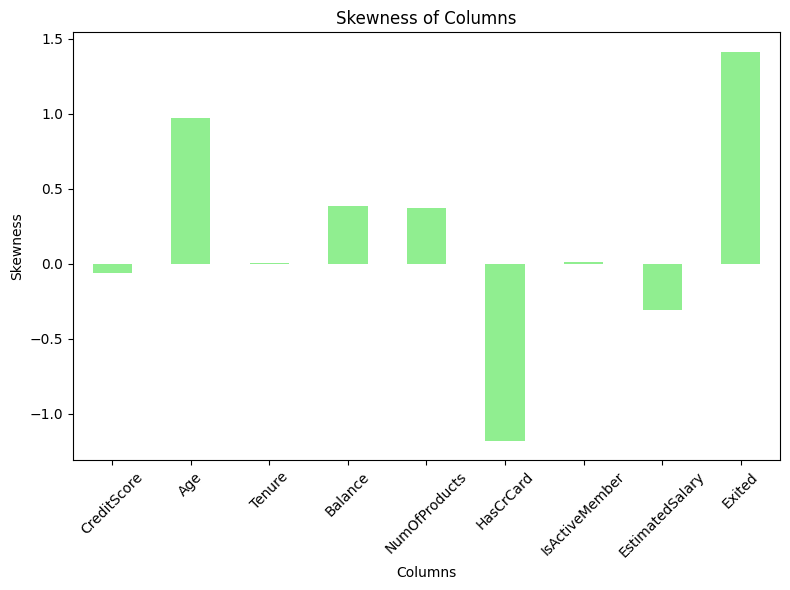

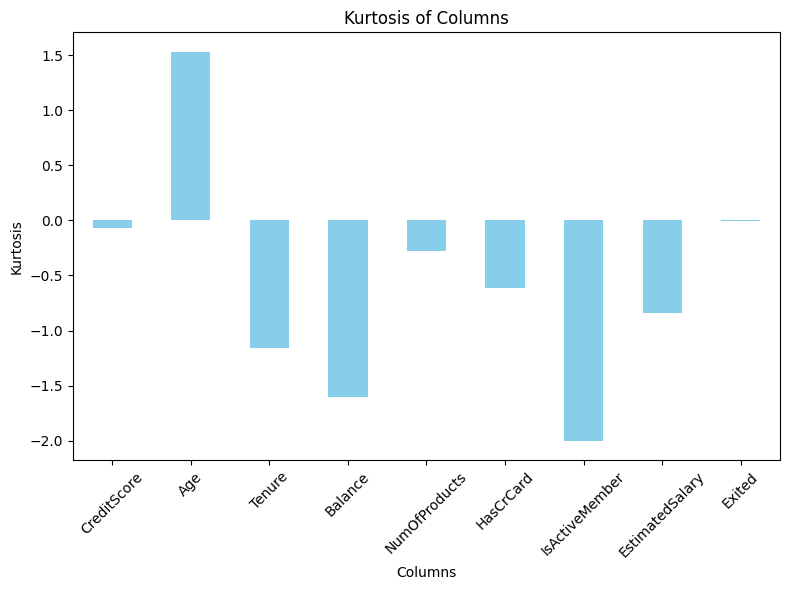

In [14]:
# Checking Skewness and Kurtosis

df_num = df.select_dtypes(exclude = ['object'])

# Plotting skewness values
skewness = df_num.skew()

plt.figure(figsize=(8, 6))
skewness.plot(kind='bar', color='lightgreen')
plt.title('Skewness of Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting kurtosis values
kurtosis_values = df_num.kurtosis()
skewness
plt.figure(figsize=(8, 6))
kurtosis_values.plot(kind='bar', color='skyblue')
plt.title('Kurtosis of Columns')
plt.xlabel('Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

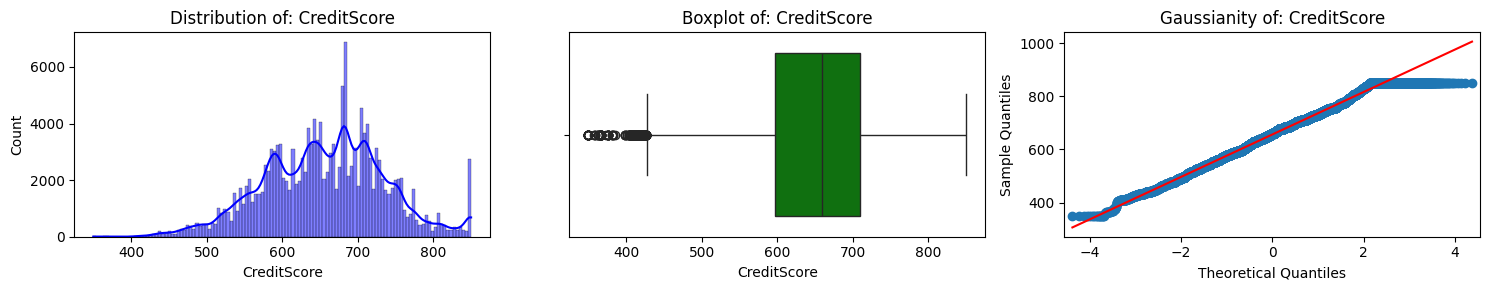

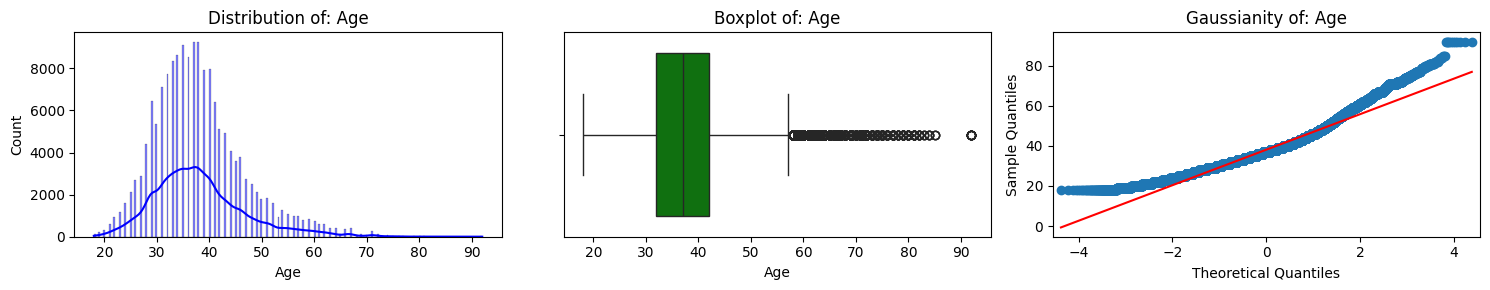

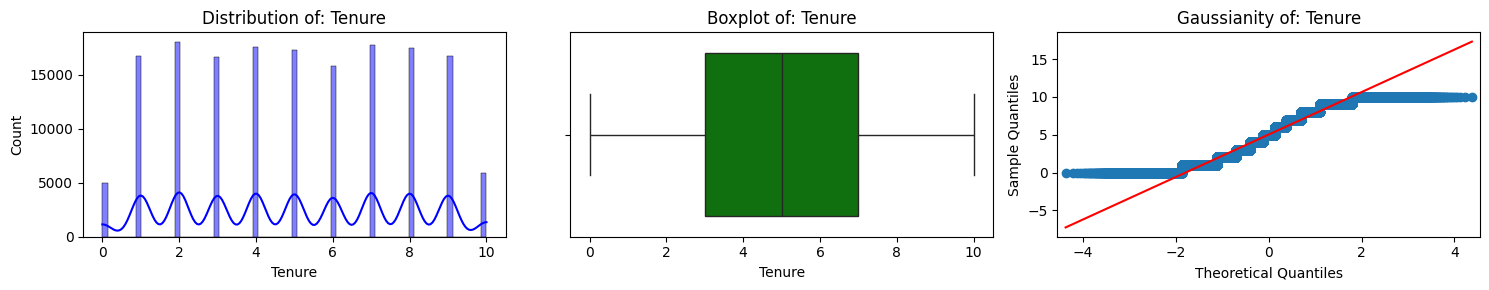

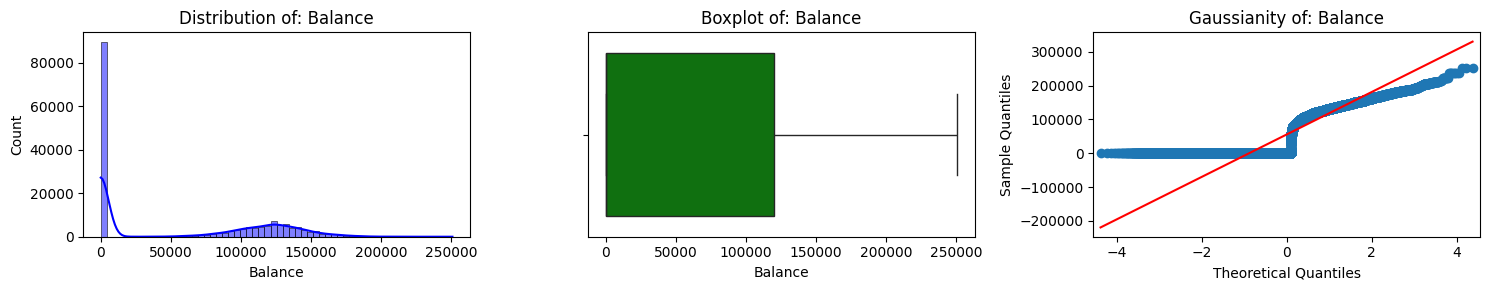

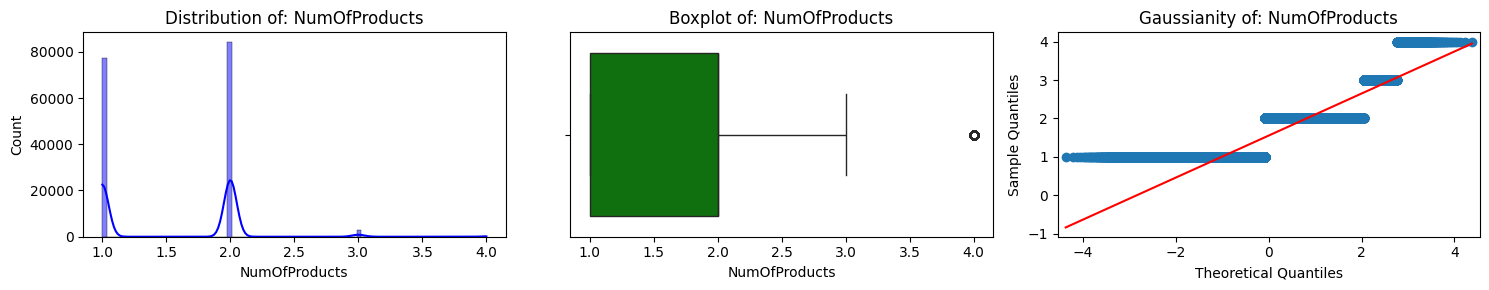

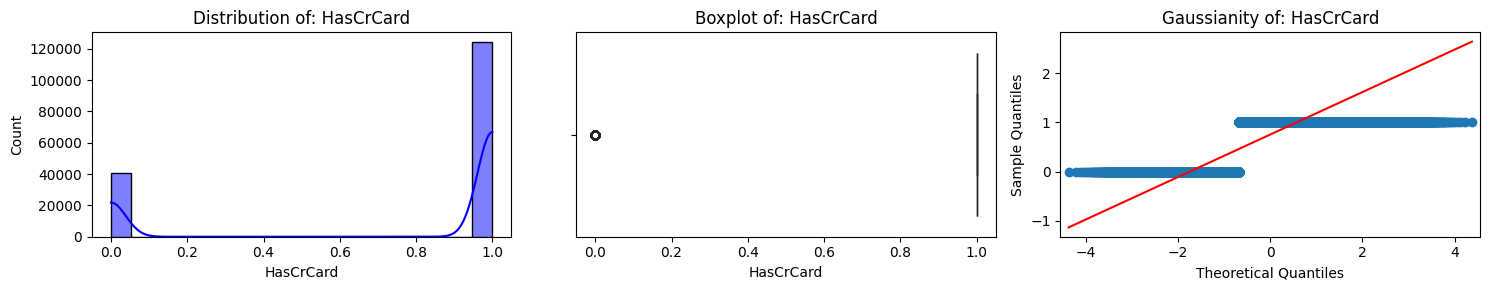

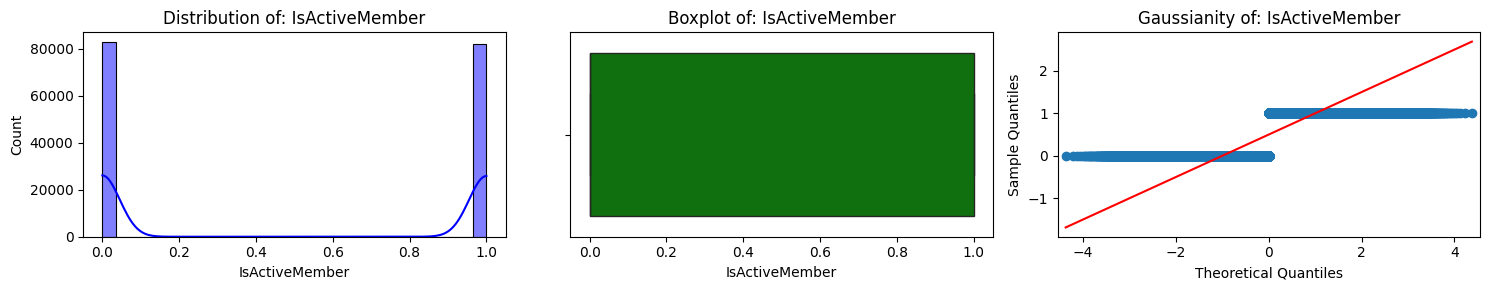

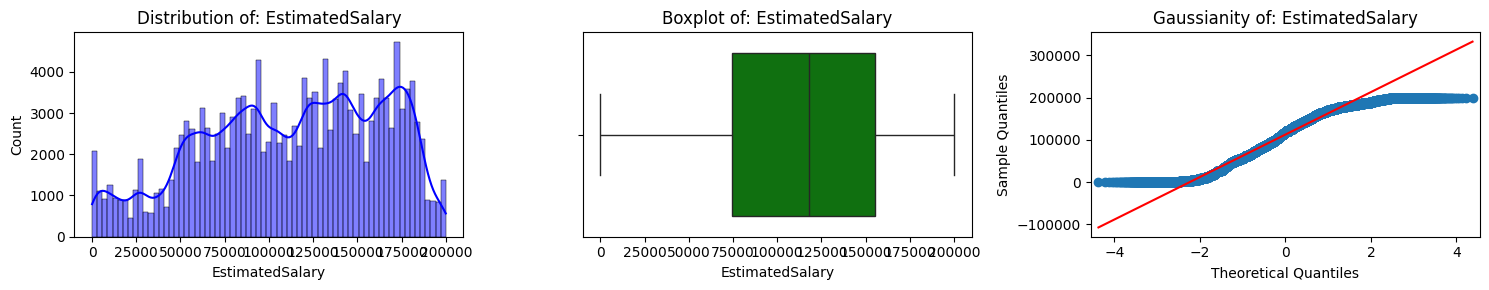

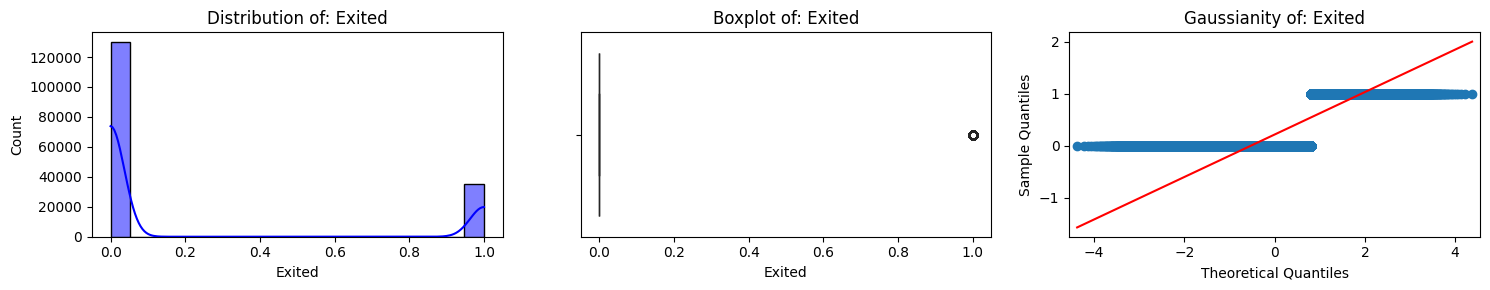

In [15]:
# Distribution

for numerical_feature in df_num.columns:
    
    # Creating three subplots per numerical_feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
        
    # Histogram to get an overview of the distribution of each numerical_feature
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data=df_num, x=numerical_feature, kde=True, ax=ax[0], color='blue')
    
    # Boxplot to detect outliers
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(data=df_num, x=numerical_feature, ax=ax[1], color='green')
    
    # Analyzing whether a feature is normally distributed or not
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(df_num[numerical_feature], line='s', ax=ax[2], color='orange')
    
    plt.tight_layout()
    plt.show()

## <font color='289C4E'>4.2. Distribution Categorical Columns 🅰️<font><a class='anchor' id='cat'></a>

**Key Findings** 

- `Geography`: More than half of the clients seems to be based in France, being Spain and Germany the other countries, which are equally distributed
- The `Gender` distribution seems to be more or less balancce, being male predominant

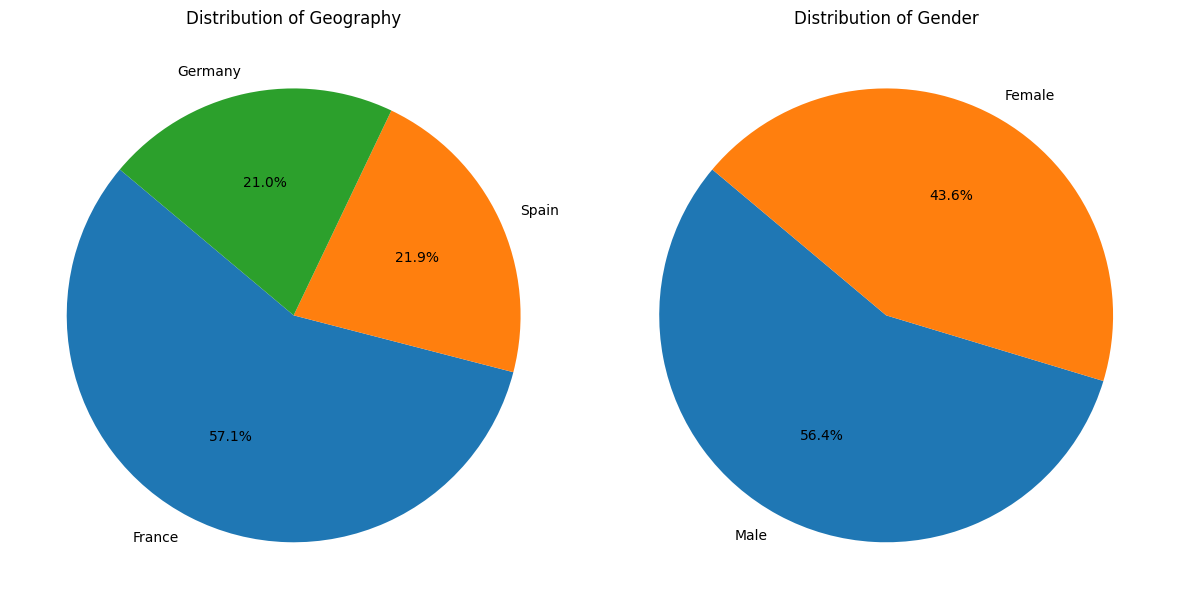

In [16]:
# Selecting two categorical columns for pie charts
categorical_columns = ['Geography', 'Gender']

# Create subplots using Seaborn
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting pie charts for each categorical column
for i, col in enumerate(categorical_columns):
    # Count the occurrences of each category
    category_counts = df[col].value_counts()
    
    # Plotting pie chart within Seaborn subplots
    axs[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


## <font color='289C4E'>4.3. Correlation 🎹<font><a class='anchor' id='corr'></a>

**Key Findings** 

- `Age`, `NumOfProducts`, `Balance` and `isActiveMember`  are the only ones correlated with the target, Although the correlation, 0.34 for age is not very high. This means that we will have to perform feature selection to chose the best features for our model.

- As the `Age` is positively correlated, the older a person is, the more chances to churn. Also, the more products a client has, the less chances to churn. Active members, churn less than non active members, and the more salary,the more chances to churn

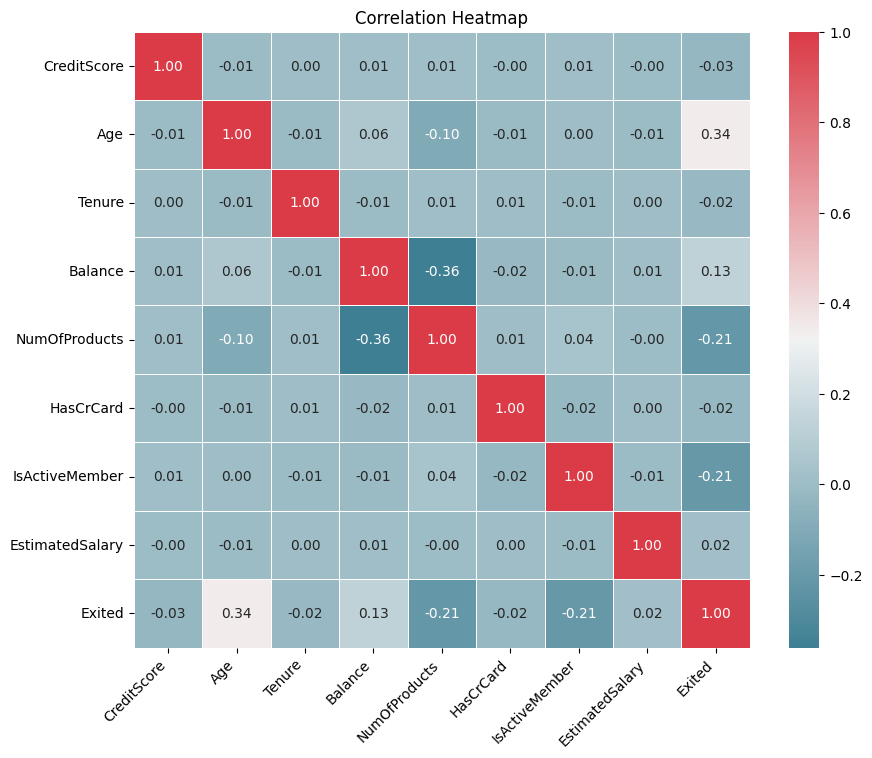

In [17]:
# Plot Bitcoin correlations

plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')

# Create a custom color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot the correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, square=True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

## <font color='289C4E'>4.4. Overall Churn 🎹<font><a class='anchor' id='churn'></a>

**Key Findings** 

- The overall churn rate seems to be 21 % of all clients. 

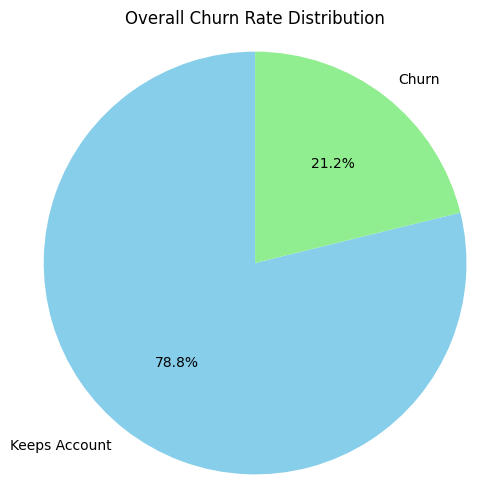

In [18]:
# Count the occurrences of each value in the 'Exited' column
exit_counts = df['Exited'].value_counts()

# Custom labels for the pie chart
labels = ['Keeps Account', 'Churn']

# Plotting a pie chart for the 'Exited' column with custom labels
plt.figure(figsize=(6, 6))
plt.pie(exit_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Overall Churn Rate Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


## <font color='289C4E'>4.5. Bivariate Analysis 🦙<font><a class='anchor' id='biv'></a>

### <font color='289C4E'>4.5.1. Geography vs. Churn 🗺️<font><a class='anchor' id='geo'></a>

**Key Findings** 

- Being France the country with more clients, it shows the lower churn of all 3 countries with 16.5 %. On the contrary, Germany, which is the country with less clients, has the higher churn with 37.9 %

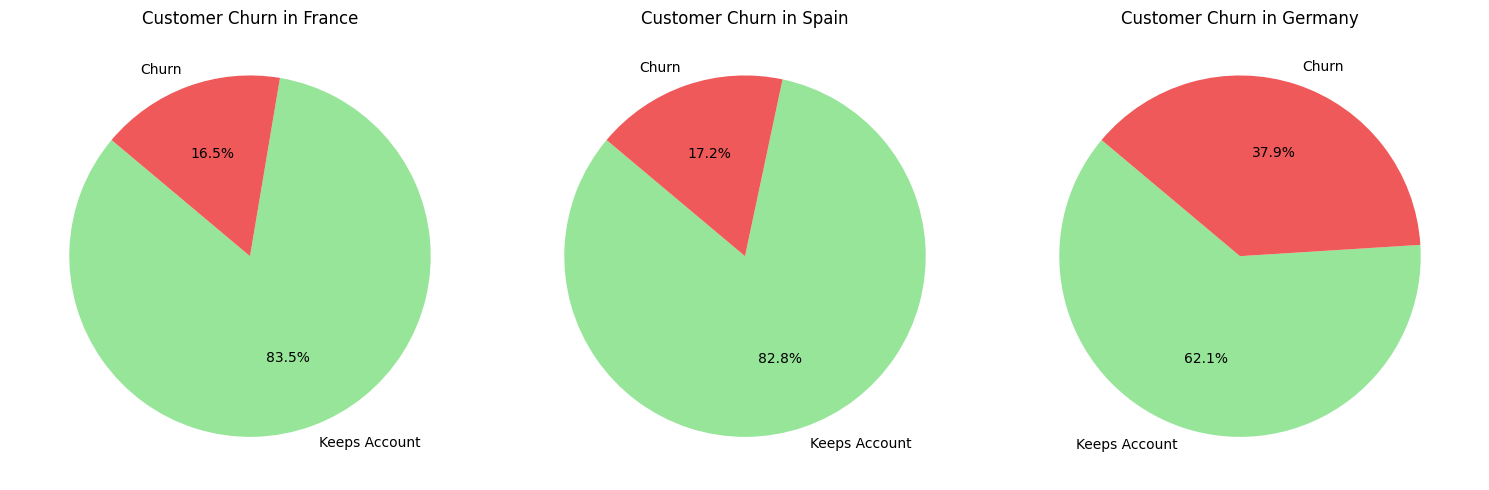

In [19]:
# Get unique values in 'Geography' column
unique_geographies = df['Geography'].unique()

# Define custom colors for the pie charts
colors = ['#96E599', '#EF5959']

# Calculate the number of subplots based on the number of unique geographies
num_plots = len(unique_geographies)

# Custom labels for the pie charts
labels = ['Keeps Account', 'Churn']

# Create subplots for each unique geography
fig, axs = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

# Plot pie charts for each unique geography
for i, geo in enumerate(unique_geographies):
    geo_df = df[df['Geography'] == geo]
    geo_counts = geo_df['Exited'].value_counts()

    # Plotting pie chart with custom labels and colors in the respective subplot
    axs[i].pie(geo_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'Customer Churn in {geo}')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


### <font color='289C4E'>4.5.2. Gender vs. Churn 👯‍♀️<font><a class='anchor' id='clean'></a>

**Key Findings** 

- Although there are more males (56 %) than females (44 %) in the bank, the churn rate in females is higher 28 % vs 15.9 %, indicating a higher customer churn in the female group

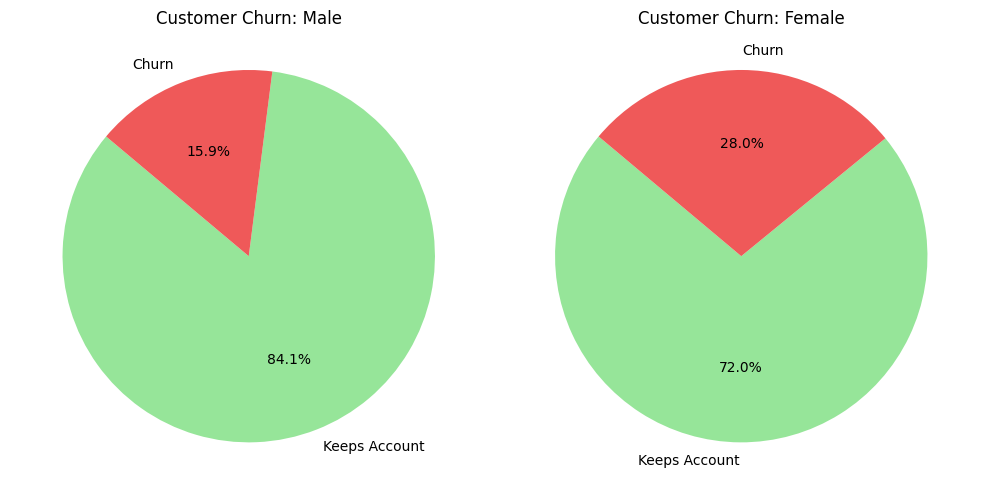

In [20]:
# Define custom colors for the pie charts
colors = ['#96E599', '#EF5959']

# Get unique values in 'Gender' column
unique_genders = df['Gender'].unique()

# Calculate the number of subplots based on the number of unique genders
num_plots = len(unique_genders)

# Create subplots for each unique gender
fig, axs = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

# Custom labels for the pie charts
labels = ['Keeps Account', 'Churn']

# Plot pie charts for each unique gender
for i, gen in enumerate(unique_genders):
    gen_df = df[df['Gender'] == gen]
    gen_counts = gen_df['Exited'].value_counts()
    
    # Plotting pie chart with custom colors
    axs[i].pie(gen_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axs[i].set_title(f'Customer Churn: {gen}')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()


### <font color='289C4E'>4.5.3. Credit Score vs. Churn 💸<font><a class='anchor' id='cret'></a>

**Key Findings** 

- The credit score is based on the credit history of the client. The higher the score, the more likely the client can get approved for loans and for better rates.

- In our case it is mainly distributed between 600 and 700, with the higher churn within these values, also the higher loyalty and with some outliers below 430.

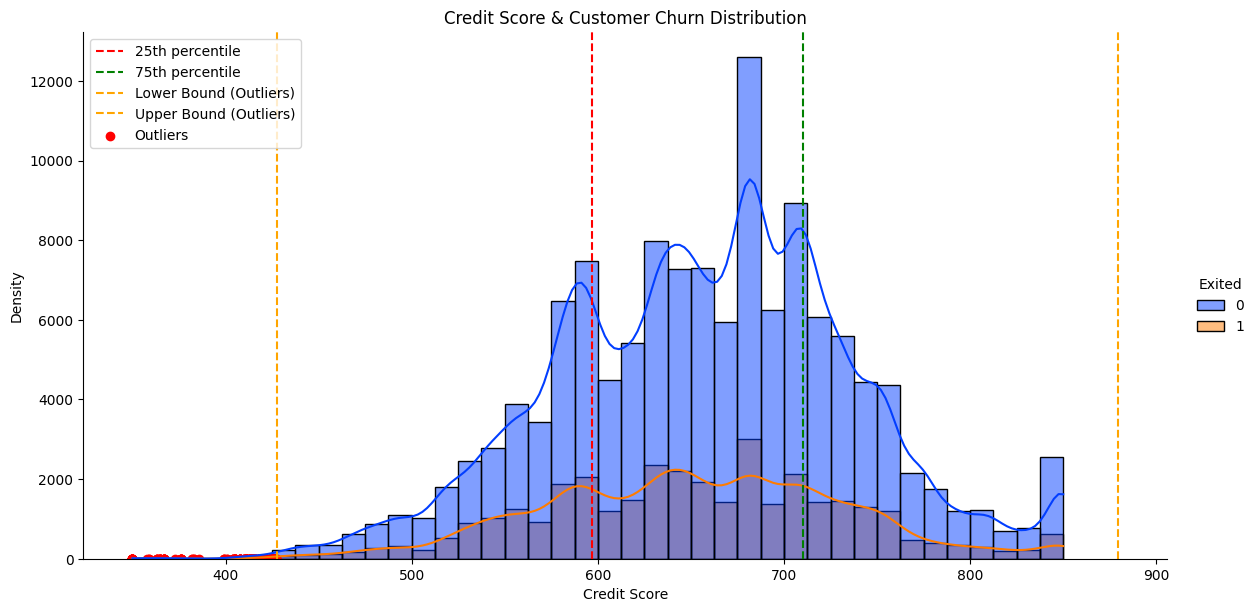

In [21]:
# Set color palette
palette = "bright"  
sns.set_palette(palette)

# Plotting the distribution of 'CreditScore' using Seaborn displot
plot = sns.displot(data=df, x='CreditScore', hue='Exited', kde=True, bins=40, height=6, aspect = 2)

# Calculate 25th and 75th percentiles
percentiles_25 = np.percentile(df['CreditScore'], [25])
percentiles_75 = np.percentile(df['CreditScore'], [75])

# Find outliers using boxplot statistics
q1, q3 = np.percentile(df['CreditScore'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['CreditScore'] < lower_bound) | (df['CreditScore'] > upper_bound)]['CreditScore']



# Overlay the plot with vertical lines for percentiles and outliers
plt.axvline(x=percentiles_25[0], color='red', linestyle='--', label='25th percentile')
plt.axvline(x=percentiles_75[0], color='green', linestyle='--', label='75th percentile')

plt.axvline(x=lower_bound, color='orange', linestyle='--', label='Lower Bound (Outliers)')
plt.axvline(x=upper_bound, color='orange', linestyle='--', label='Upper Bound (Outliers)')
plt.scatter(outliers, np.zeros_like(outliers), color='red', marker='o', label='Outliers')

plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.title('Credit Score & Customer Churn Distribution')  

plt.legend(loc = 'upper left')  
plt.show()

### <font color='289C4E'>4.5.4. Age vs. Churn 🧓<font><a class='anchor' id='ag'></a>

**Key Findings** 

- The main age distribution ranges from 30 to 40 with outliers above 60. 

- The most loyal clients are in the main range, whereas the peak of the churn goes from 40 to 60.

In [22]:
age_churn_percentage = df.groupby('Age')['Exited'].mean() * 100
print(f"Average churn per age group:\n{age_churn_percentage}")

Average churn per age group:
Age
18.0    13.559322
19.0     8.411215
20.0     6.547619
21.0     4.890388
22.0    12.768240
          ...    
82.0    14.285714
83.0    33.333333
84.0     0.000000
85.0     0.000000
92.0     9.090909
Name: Exited, Length: 71, dtype: float64


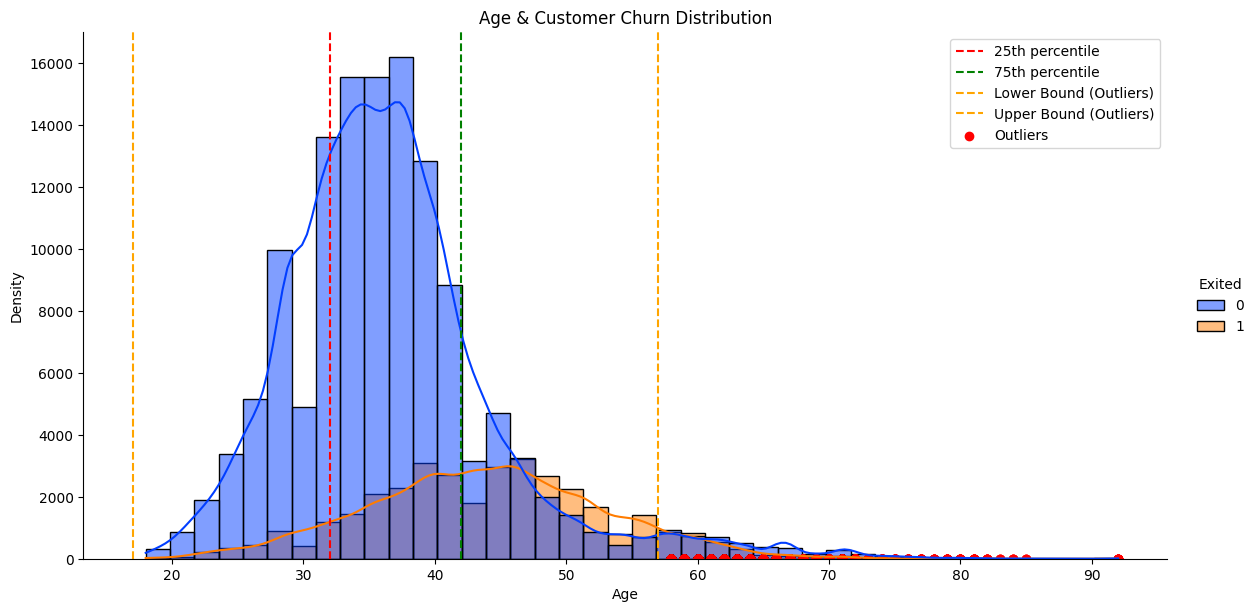

In [23]:
# Set color palette
palette = "bright"  
sns.set_palette(palette)

# Plotting the distribution of 'CreditScore' using Seaborn displot
plot = sns.displot(data=df, x='Age', hue='Exited', kde=True, bins=40, height=6, aspect = 2)

# Calculate 25th and 75th percentiles
percentiles_25 = np.percentile(df['Age'], [25])
percentiles_75 = np.percentile(df['Age'], [75])

# Find outliers using boxplot statistics
q1, q3 = np.percentile(df['Age'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]['Age']



# Overlay the plot with vertical lines for percentiles and outliers
plt.axvline(x=percentiles_25[0], color='red', linestyle='--', label='25th percentile')
plt.axvline(x=percentiles_75[0], color='green', linestyle='--', label='75th percentile')

plt.axvline(x=lower_bound, color='orange', linestyle='--', label='Lower Bound (Outliers)')
plt.axvline(x=upper_bound, color='orange', linestyle='--', label='Upper Bound (Outliers)')
plt.scatter(outliers, np.zeros_like(outliers), color='red', marker='o', label='Outliers')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age & Customer Churn Distribution')  

plt.legend(loc = 'upper right')  
plt.show()

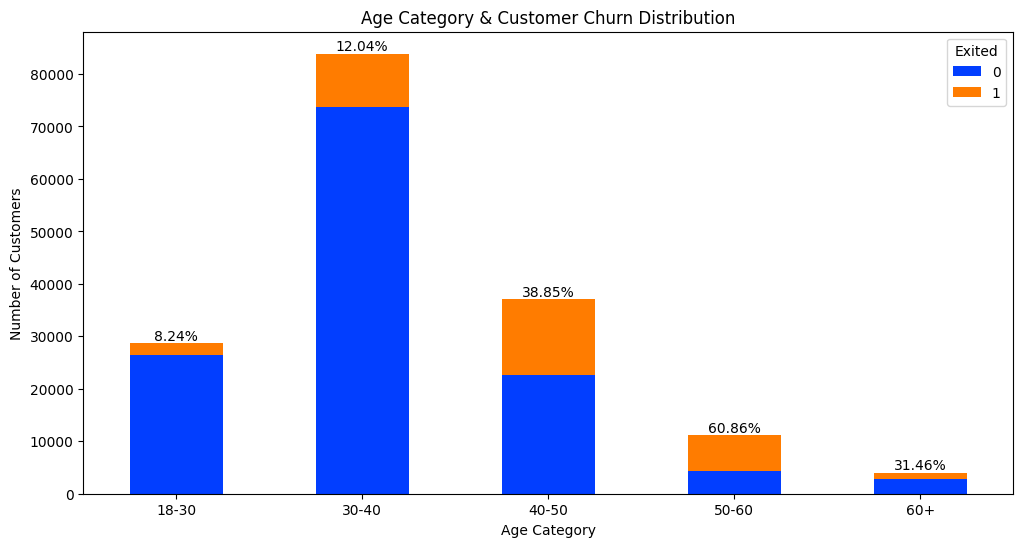

In [24]:
# Create a dataframe with age ranges
def age_tr(df) : 
    df['Age_Category'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])

    return df

df_age = df.copy()
df_age = age_tr(df_age)

# Set palette
palette = "bright"
sns.set_palette(palette)

# Plotting the crosstab as a stacked bar chart
ax = pd.crosstab(df_age['Age_Category'], df_age['Exited']).plot(kind='bar', stacked=True)

# Calculate the percentage of 'Exited' equal to 1 for each 'Age Category'
exited_1_percentages = (df_age[df_age['Exited'] == 1]['Age_Category'].value_counts() / df_age['Age_Category'].value_counts()) * 100

# Customize the legend location
plt.legend(title='Exited', loc='upper right')

plt.xlabel('Age Category')
plt.ylabel('Number of Customers')
plt.title('Age Category & Customer Churn Distribution')

# Set the figure size
plt.gcf().set_size_inches(12, 6)  # Width, Height

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Adding annotations for the percentage of 'Exited' equal to 1 on top of the bars
for i, (percentage, bar) in enumerate(zip(exited_1_percentages, ax.patches)):
    height = sum([bar.get_height() for bar in ax.patches[i::len(exited_1_percentages)]])
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

### <font color='289C4E'>4.5.5. Tenure vs. Churn ⏳<font><a class='anchor' id='ten'></a>

**Key Findings** 

- The customer tenure spans from 1 to 10 years, being 80 % of the clients in the range of 1 to 9 years

- The churn of the clients remains relatively constant between 18 % and 25 %, whereas the most weight on the overall churn remain on the 1-9 range representing 94 % of the clients

In [25]:
print(f"Churn specific weight per {df['Tenure'].value_counts(normalize=True).mul(100).sort_index()}")

Churn specific weight per Tenure
0      3.035577
1     10.153962
2     10.930138
3     10.076951
4     10.638466
5     10.460188
6      9.587596
7     10.790063
8     10.619668
9     10.127281
10     3.580113
Name: proportion, dtype: float64


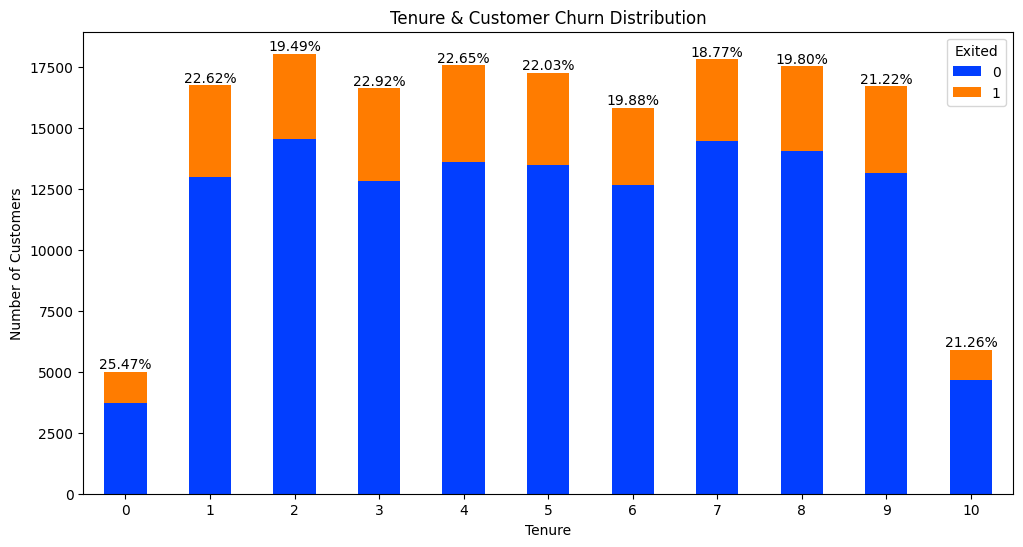

In [26]:
# Set palette
palette = "bright"
sns.set_palette(palette)

# Plotting the crosstab as a stacked bar chart
ax = pd.crosstab(df['Tenure'], df['Exited']).plot(kind='bar', stacked=True)

# Calculate the percentage of 'Exited' equal to 1 for each 'NumOfProducts'
exited_1_percentages = (df[df['Exited'] == 1]['Tenure'].value_counts() / df['Tenure'].value_counts()) * 100

# Customize the legend location
plt.legend(title='Exited', loc='upper right')

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Tenure & Customer Churn Distribution')

# Set the figure size
plt.gcf().set_size_inches(12, 6)  # Width, Height

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Adding annotations for the percentage of 'Exited' equal to 1 on top of the bars
for i, (percentage, bar) in enumerate(zip(exited_1_percentages, ax.patches)):
    height = sum([bar.get_height() for bar in ax.patches[i::len(exited_1_percentages)]])
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

### <font color='289C4E'>4.5.6. Balance vs. Churn ⚖️<font><a class='anchor' id='bal'></a>

**Key Findings** 

- More than half of the clients (54 %) do not have money in their account, from which 16 % has churned

- The rest of the client seems to have an average amount of money of 125'000 and show a churn rate of almost 27 % within this distribution group

In [27]:
# Count the rows where 'Balance' column equals 0
zero_balance_count = (df['Balance'] == 0).sum()

# Calculate the total number of rows 
total_rows = df.shape[0]

# Calculate the percentage of rows where 'Balance' column is 0
percentage_zero_balance = (zero_balance_count / total_rows) * 100

print(f"The percentage of rows where 'Balance' is 0: {percentage_zero_balance:.2f}%")

The percentage of rows where 'Balance' is 0: 54.32%


In [28]:
# Count the rows where 'Balance' column equals 0
zero_balance_count = (df['Balance'] == 0).sum()

# Count the rows where 'Balance' is 0 and 'Exited' is 1
zero_balance_exited_1 = ((df['Balance'] == 0) & (df['Exited'] == 1)).sum()

# Calculate the percentage of rows where 'Balance' is 0 and 'Exited' is 1
percentage_zero_balance_exited_1 = (zero_balance_exited_1 / zero_balance_count) * 100

print(f"The percentage of rows where 'Balance' is 0 and 'Exited' is 1: {percentage_zero_balance_exited_1:.2f}%")

The percentage of rows where 'Balance' is 0 and 'Exited' is 1: 16.18%


In [29]:
# Count the rows where 'Balance' column equals 0
nonzero_balance_count = (df['Balance'] != 0).sum()

# Count the rows where 'Balance' is 0 and 'Exited' is 1
nonzero_balance_exited_1 = ((df['Balance'] != 0) & (df['Exited'] == 1)).sum()

# Calculate the percentage of rows where 'Balance' is 0 and 'Exited' is 1
percentage_nonzero_balance_exited_1 = (nonzero_balance_exited_1 / nonzero_balance_count) * 100

print(f"The percentage of rows where 'Balance' is 0 and 'Exited' is 1: {percentage_nonzero_balance_exited_1:.2f}%")

The percentage of rows where 'Balance' is 0 and 'Exited' is 1: 27.11%


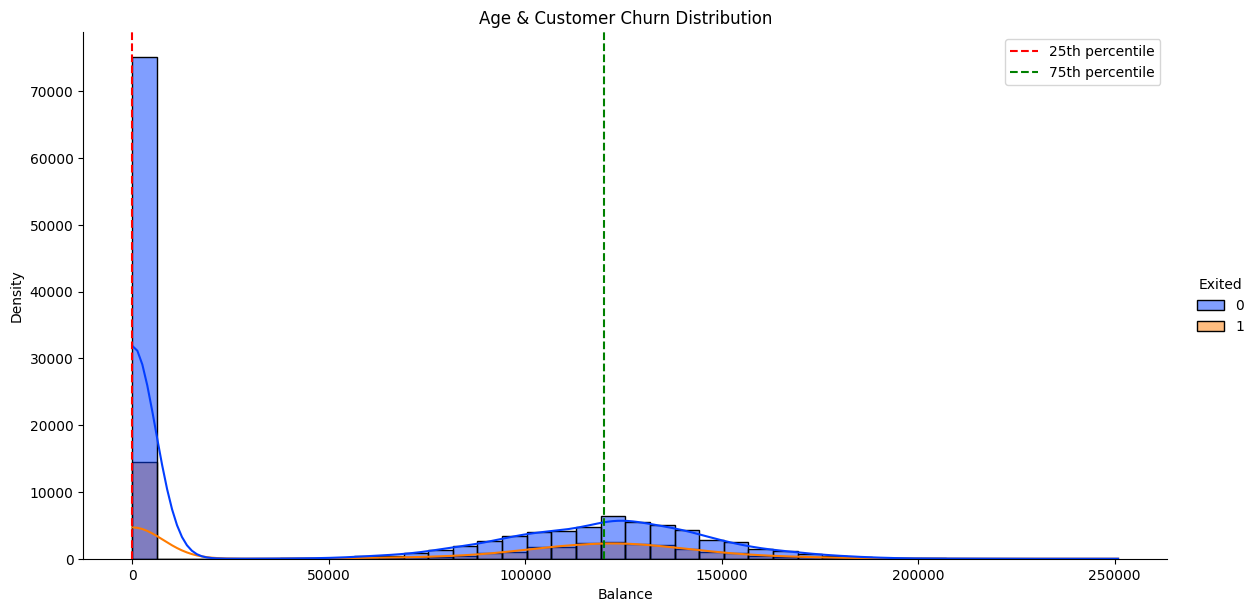

In [30]:
# Set color palette
palette = "bright"  
sns.set_palette(palette)

# Plotting the distribution of 'CreditScore' using Seaborn displot
plot = sns.displot(data=df, x='Balance', hue='Exited', kde=True, bins=40, height=6, aspect = 2)

# Calculate 25th and 75th percentiles
percentiles_25 = np.percentile(df['Balance'], [25])
percentiles_75 = np.percentile(df['Balance'], [75])

# Find outliers using boxplot statistics
q1, q3 = np.percentile(df['Balance'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Overlay the plot with vertical lines for percentiles and outliers
plt.axvline(x=percentiles_25[0], color='red', linestyle='--', label='25th percentile')
plt.axvline(x=percentiles_75[0], color='green', linestyle='--', label='75th percentile')

plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Age & Customer Churn Distribution')  

plt.legend(loc = 'upper right')  
plt.show()

### <font color='289C4E'>4.5.7. Number of Products vs. Churn 🔢<font><a class='anchor' id='num'></a>

**Key Findings** 

- People with 3 and 4 products show the higher churn rate with 88 %, but it only represents 2 % of the clients. On the other hand people with only 1 product have the higher churn rate specific weight as it accounts for 46 % of all churns and 34 % within it distribution group

- People with 2 products only churn by 6 %, representing the most estable group

- Comparing to the correlation heatmap, there is an inverse correlation between salary and churn. This is the case for the first 2 products but does not match for the 3rd and 4th product

In [31]:
print(f"Average churn per {df['NumOfProducts'].value_counts(normalize=True).mul(100).sort_index()}")

Average churn per NumOfProducts
1    46.887715
2    51.070577
3     1.753673
4     0.288034
Name: proportion, dtype: float64


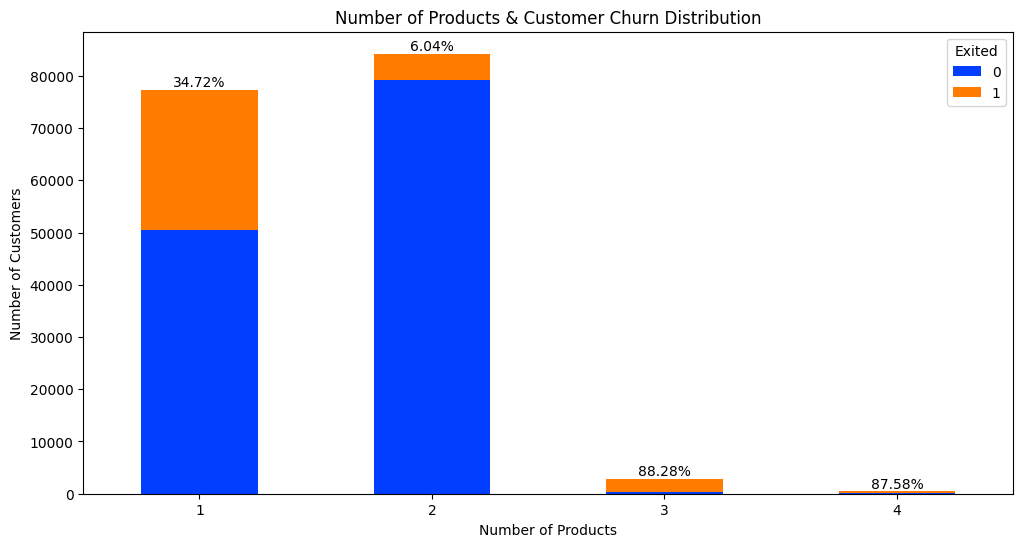

In [32]:
# Set palette
palette = "bright"
sns.set_palette(palette)

# Plotting the crosstab as a stacked bar chart
ax = pd.crosstab(df['NumOfProducts'], df['Exited']).plot(kind='bar', stacked=True)

# Calculate the percentage of 'Exited' equal to 1 for each 'NumOfProducts'
exited_1_percentages = (df[df['Exited'] == 1]['NumOfProducts'].value_counts() / df['NumOfProducts'].value_counts()) * 100

# Customize the legend location
plt.legend(title='Exited', loc='upper right')

plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.title('Number of Products & Customer Churn Distribution')

# Set the figure size
plt.gcf().set_size_inches(12, 6)  # Width, Height

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Adding annotations for the percentage of 'Exited' equal to 1 on top of the bars
for i, (percentage, bar) in enumerate(zip(exited_1_percentages, ax.patches)):
    height = sum([bar.get_height() for bar in ax.patches[i::len(exited_1_percentages)]])
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

### <font color='289C4E'>4.5.8. Has Credit Card vs. Churn 💳<font><a class='anchor' id='has'></a>

**Key Findings** 

- The churn rate within both groups is around 20-22 %, where most of the clients, 75 % , have a credit card

In [33]:
print(f"Average churn per {df['HasCrCard'].value_counts(normalize=True).mul(100).sort_index()}")

Average churn per HasCrCard
0.0    24.608425
1.0    75.391575
Name: proportion, dtype: float64


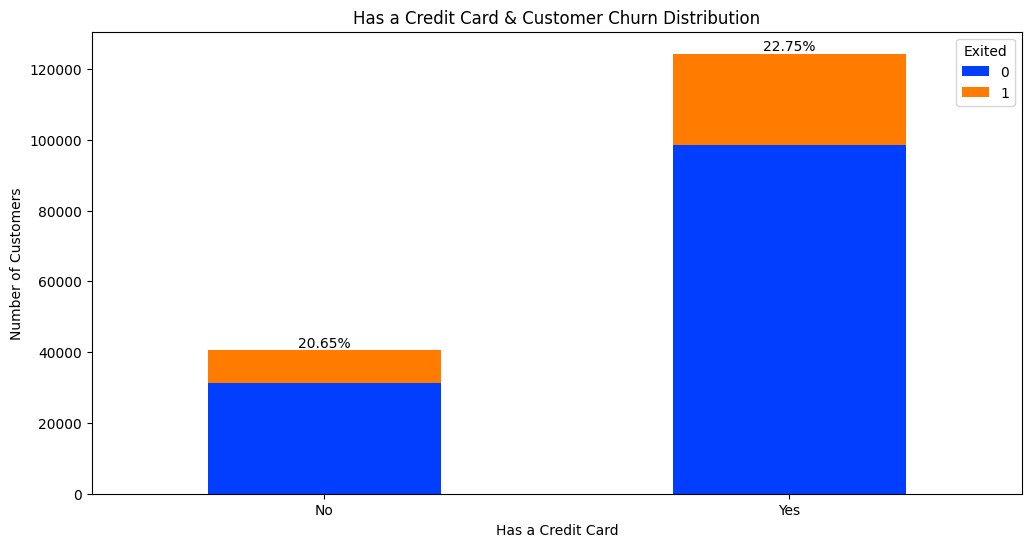

In [34]:
# Set palette
palette = "bright"
sns.set_palette(palette)

# Plotting the crosstab as a stacked bar chart
ax = pd.crosstab(df['HasCrCard'], df['Exited']).plot(kind='bar', stacked=True)

# Calculate the percentage of 'Exited' equal to 1 for each 'NumOfProducts'
exited_1_percentages = (df[df['Exited'] == 1]['HasCrCard'].value_counts() / df['HasCrCard'].value_counts()) * 100

# Customize the legend location
plt.legend(title='Exited', loc='upper right')

plt.xlabel('Has a Credit Card')
plt.ylabel('Number of Customers')
plt.title('Has a Credit Card & Customer Churn Distribution')

# Set the figure size
plt.gcf().set_size_inches(12, 6)  # Width, Height

# Rotate x-axis labels horizontally
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)


# Adding annotations for the percentage of 'Exited' equal to 1 on top of the bars
for i, (percentage, bar) in enumerate(zip(exited_1_percentages, ax.patches)):
    height = sum([bar.get_height() for bar in ax.patches[i::len(exited_1_percentages)]])
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

### <font color='289C4E'>4.5.9. Is Active Member vs. Churn 🏂<font><a class='anchor' id='act'></a>

**Key Findings** 

- The distribution of active members vs non active members is 50 % each, whereas non active members tend to churn more, almost 30 %

In [35]:
print(f"Average churn per {df['IsActiveMember'].value_counts(normalize=True).mul(100).sort_index()}")

Average churn per IsActiveMember
0.0    50.230731
1.0    49.769269
Name: proportion, dtype: float64


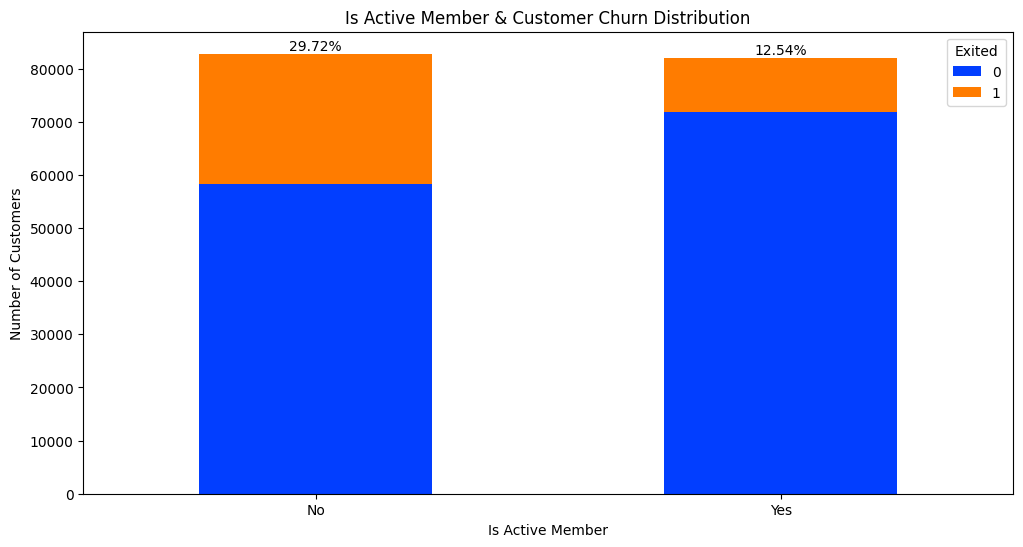

In [36]:
# Set palette
palette = "bright"
sns.set_palette(palette)

# Plotting the crosstab as a stacked bar chart
ax = pd.crosstab(df['IsActiveMember'], df['Exited']).plot(kind='bar', stacked=True)

# Calculate the percentage of 'Exited' equal to 1 for each 'NumOfProducts'
exited_1_percentages = (df[df['Exited'] == 1]['IsActiveMember'].value_counts() / df['IsActiveMember'].value_counts()) * 100

# Customize the legend location
plt.legend(title='Exited', loc='upper right')

plt.xlabel('Is Active Member')
plt.ylabel('Number of Customers')
plt.title('Is Active Member & Customer Churn Distribution')

# Set the figure size
plt.gcf().set_size_inches(12, 6)  # Width, Height

# Rotate x-axis labels horizontally
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Adding annotations for the percentage of 'Exited' equal to 1 on top of the bars
for i, (percentage, bar) in enumerate(zip(exited_1_percentages, ax.patches)):
    height = sum([bar.get_height() for bar in ax.patches[i::len(exited_1_percentages)]])
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

### <font color='289C4E'>4.5.10. Estimated Salary vs. Churn 💷<font><a class='anchor' id='sal'></a>
   

**Key Findings** 

- The main part of the distribution of salaries  lies within 75'000 and 150'000 with churn rates between 20 % and 25 %, where higher salaries show a sllightly higher churn rate

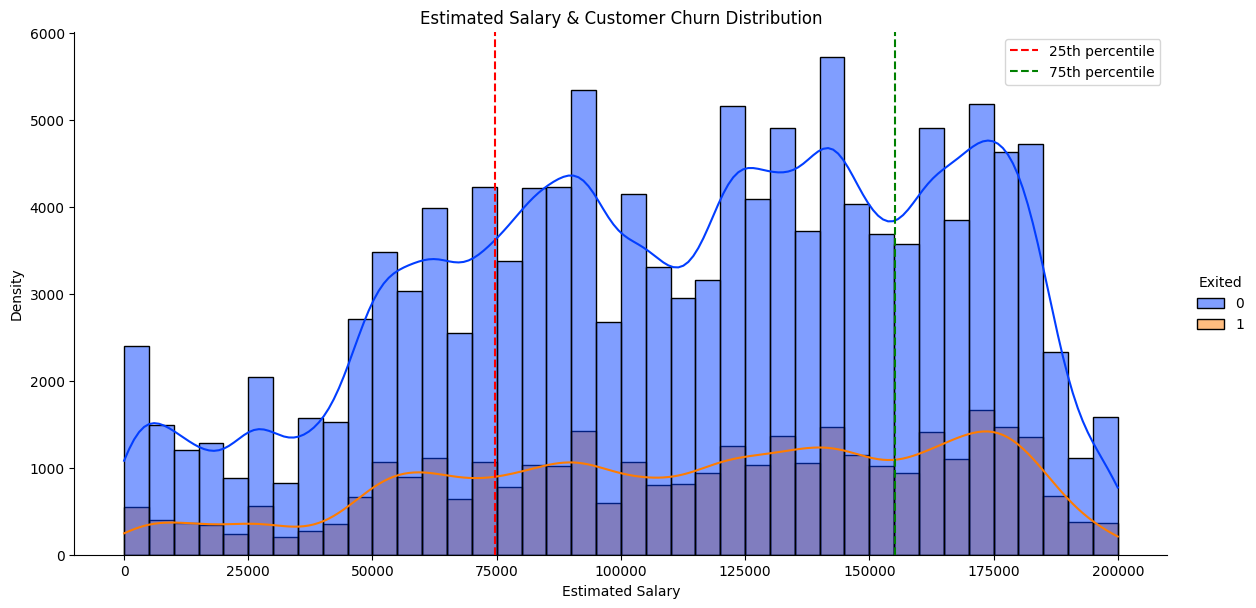

In [37]:
# Set color palette
palette = "bright"  
sns.set_palette(palette)

# Plotting the distribution of 'CreditScore' using Seaborn displot
plot = sns.displot(data=df, x='EstimatedSalary', hue='Exited', kde=True, bins=40, height=6, aspect = 2)

# Calculate 25th and 75th percentiles
percentiles_25 = np.percentile(df['EstimatedSalary'], [25])
percentiles_75 = np.percentile(df['EstimatedSalary'], [75])

# Find outliers using boxplot statistics
q1, q3 = np.percentile(df['EstimatedSalary'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


# Overlay the plot with vertical lines for percentiles and outliers
plt.axvline(x=percentiles_25[0], color='red', linestyle='--', label='25th percentile')
plt.axvline(x=percentiles_75[0], color='green', linestyle='--', label='75th percentile')

plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.title('Estimated Salary & Customer Churn Distribution')  

plt.legend(loc = 'upper right')  
plt.show()

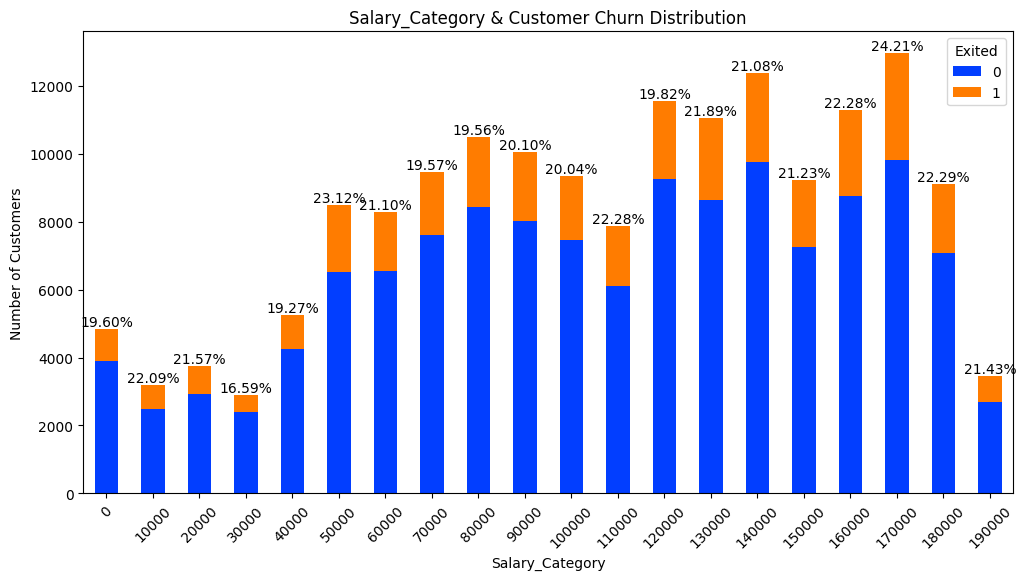

In [38]:
# Create a dataframe with salary ranges
def salary_tr(df) : 
    # Define the bins and labels
    bins = list(range(0, 200001, 10000))  # Generate bins from 0 to 200000 with step 10000
    labels = [str(i) for i in bins[:-1]]  # Convert bin edges to string labels

    # Apply pd.cut to create Salary_Category based on EstimatedSalary
    df['Salary_Category'] = pd.cut(df['EstimatedSalary'], bins=bins, labels=labels, include_lowest=True)
    
    return df

df_salary = df.copy()
df_salary = salary_tr(df_salary)

# Set palette
palette = "bright"
sns.set_palette(palette)

# Plotting the crosstab as a stacked bar chart
ax = pd.crosstab(df_salary['Salary_Category'], df_salary['Exited']).plot(kind='bar', stacked=True)

# Calculate the percentage of 'Exited' equal to 1 for each 'Age Category'
exited_1_percentages = (df_salary[df_salary['Exited'] == 1]['Salary_Category'].value_counts() / df_salary['Salary_Category'].value_counts()) * 100

# Customize the legend location
plt.legend(title='Exited', loc='upper right')

plt.xlabel('Salary_Category')
plt.ylabel('Number of Customers')
plt.title('Salary_Category & Customer Churn Distribution')

# Set the figure size
plt.gcf().set_size_inches(12, 6)  # Width, Height

# Rotate x-axis labels horizontally
plt.xticks(rotation=45)

# Adding annotations for the percentage of 'Exited' equal to 1 on top of the bars
for i, (percentage, bar) in enumerate(zip(exited_1_percentages, ax.patches)):
    height = sum([bar.get_height() for bar in ax.patches[i::len(exited_1_percentages)]])
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

In [39]:
# import pandas as pd
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# # Assuming 'df' is your DataFrame and 'Exited' is the column to balance
# # Separating features and target variable
# X = df.drop(columns=['Exited'])
# y = df['Exited']

# # Apply random undersampling to balance the dataset
# undersample = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = undersample.fit_resample(X, y)

# # Create a new DataFrame with the resampled data
# df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Exited')], axis=1)

# # 'resampled_df' now contains the balanced dataset merged back into a DataFrame


# # Now you can use X_resampled and y_resampled for training your model
# import matplotlib.pyplot as plt

# # Assuming 'column_name' is the column you want to visualize
# plt.figure(figsize=(8, 6))
# df['Exited'].value_counts().plot(kind='bar')
# plt.title('Distribution of Labels in Column')
# plt.xlabel('Labels')
# plt.ylabel('Frequency')
# plt.show()

# <font color='289C4E'>5 Feature Importance 🪶<font><a class='anchor' id='imp'></a>

**Key Findings** 

- Adding additional features to the dataset, like combining geography with gender, or grouping the age every 5 years, has shown that by performing feature importance, some of these features are on the top 10 features for specific models, like `Geography_Germany` or `Age_Category_48_52`

- The feature importance varies from model to model, but some features remain always on the top 10 like: `Age`, `NumOfProducts`, `IsActiveMember`

## <font color='289C4E'>5.1. Feature Extraction 🏛️<font><a class='anchor' id='ext'></a>

We have seen that the majority of our data are not simetrically distributed and there are some features that we could group in bins. Considering the results of the EDA, we will create the following new features:

- `Age_Category`: grouping `Age` in bins of 5 years
- `Salary_Category`: grouping `EstimatedSalary` in bins of 10'000 USD
- `Balance_Class`: creating a category (0,1), whether it has money in the account or not
- `Geo_Gender`: grouping `Geography` with `Gender`

In [40]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [41]:
# Adding new features

class DataTransformer:
    def __init__(self, df):
        self.df = df
    
    def add_geo_gender(self):
        self.df['Geo_Gender'] = self.df['Geography'] + "_" + self.df['Gender']
    
    def salary_tr(self): 
        bins = list(range(0, 200001, 10000))
        labels = [str(i) for i in bins[:-1]]

        self.df['Salary_Category'] = pd.cut(self.df['EstimatedSalary'], bins=bins, labels=labels, include_lowest=True)
        self.df['Salary_Category'] = self.df['Salary_Category'].astype('object')
    
    def age_tr(self):
        bins = list(range(18, 101, 5))
        labels = [f'{i}-{i+4}' for i in bins[:-1]]
        
        self.df['Age_Category'] = pd.cut(self.df['Age'], bins=bins, labels=labels, include_lowest=True)
        self.df['Age_Category'] = self.df['Age_Category'].astype('object')
    
    def cred_score_tr(self):
        bins = list(range(0, 1001, 50))
        labels = [f'{i}-{i+49}' for i in bins[:-1]]
        
        self.df['Credit_Score_Range'] = pd.cut(self.df['CreditScore'], bins=bins, labels=labels, include_lowest=True)
        self.df['Credit_Score_Range'] = self.df['Credit_Score_Range'].astype('object')
 
    def balance_class(self):
        self.df['Balance_Class'] = np.where(self.df['Balance'] == 0, 0, 1)
    
    def transform_all(self):
        self.add_geo_gender()
        self.salary_tr()
        self.age_tr()
        self.cred_score_tr()
        self.balance_class()

        return self.df


In [42]:
# Apply transformation

transformer = DataTransformer(df)
df = transformer.transform_all()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164911 entries, 0 to 165033
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         164911 non-null  int64  
 1   Geography           164911 non-null  object 
 2   Gender              164911 non-null  object 
 3   Age                 164911 non-null  float64
 4   Tenure              164911 non-null  int64  
 5   Balance             164911 non-null  float64
 6   NumOfProducts       164911 non-null  int64  
 7   HasCrCard           164911 non-null  float64
 8   IsActiveMember      164911 non-null  float64
 9   EstimatedSalary     164911 non-null  float64
 10  Exited              164911 non-null  int64  
 11  Geo_Gender          164911 non-null  object 
 12  Salary_Category     164911 non-null  object 
 13  Age_Category        164911 non-null  object 
 14  Credit_Score_Range  164911 non-null  object 
 15  Balance_Class       164911 non-null  in

## <font color='289C4E'>5.2. Features Classification 🙅‍<font><a class='anchor' id='class'></a>

There are several ways to classify the importance of our features. Here I have covered 3 options and compared the output of them:

 - **Mutual Info Classification**: This method basically utilizes mutual information. It calculates the mutual information value for each of the independent variables with respect to the dependent variable and selects the ones which have the most information gain. In other words, it basically measures the dependency of features with the target value. A higher score means more dependent variables.
 
 - **Feature Importance from Models**: classiffication model has a function that allow to extract the feature importances once the model has been fitted. We will try this ou with Random Forest, CatBoost and LightGBM.
 
- **SelectFromModel**: this function has the same attributes as the feature selection function from the models. We will try it in Random Forest, to compare the output


We will encode the categorical features first, so that they can be fitted to the model.

In [44]:
# Encode categorical features

categorical_columns = df.select_dtypes(include=['object']).columns

one_hot_encoded = pd.get_dummies(df[categorical_columns])

# Concatenate the one-hot encoded columns to the original dataframe
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

#Drop original categorical columns
df_encoded.drop(categorical_columns,axis=1,inplace=True)
df_encoded

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_Class,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Geo_Gender_France_Female,Geo_Gender_France_Male,Geo_Gender_Germany_Female,Geo_Gender_Germany_Male,Geo_Gender_Spain_Female,Geo_Gender_Spain_Male,Salary_Category_0,Salary_Category_10000,Salary_Category_100000,Salary_Category_110000,Salary_Category_120000,Salary_Category_130000,Salary_Category_140000,Salary_Category_150000,Salary_Category_160000,Salary_Category_170000,Salary_Category_180000,Salary_Category_190000,Salary_Category_20000,Salary_Category_30000,Salary_Category_40000,Salary_Category_50000,Salary_Category_60000,Salary_Category_70000,Salary_Category_80000,Salary_Category_90000,Age_Category_18-22,Age_Category_23-27,Age_Category_28-32,Age_Category_33-37,Age_Category_38-42,Age_Category_43-47,Age_Category_48-52,Age_Category_53-57,Age_Category_58-62,Age_Category_63-67,Age_Category_68-72,Age_Category_73-77,Age_Category_78-82,Age_Category_83-87,Age_Category_88-92,Credit_Score_Range_300-349,Credit_Score_Range_350-399,Credit_Score_Range_400-449,Credit_Score_Range_450-499,Credit_Score_Range_500-549,Credit_Score_Range_550-599,Credit_Score_Range_600-649,Credit_Score_Range_650-699,Credit_Score_Range_700-749,Credit_Score_Range_750-799,Credit_Score_Range_800-849
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,0,True,False,False,False,True,False,True,False,Fal

In [45]:
# Train/Test Split
X = df_encoded.drop(columns=['Exited'])
y = df_encoded['Exited']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### <font color='289C4E'>5.3.1. Mutual Info Classificationℹ️<font><a class='anchor' id='mut'></a>


In [46]:
# Calculate mutual information between each feature and the target variable
mutual_info = mutual_info_classif(X, y)

feature_scores_mi = pd.DataFrame({'Feature':X.columns, 'Mutual_Info_Score': mutual_info})
feature_scores_mi = feature_scores_mi.sort_values(by='Mutual_Info_Score', ascending=False)

feature_scores_mi

,Feature,Mutual_Info_Score
4,NumOfProducts,0.101922
1,Age,0.082403
6,IsActiveMember,0.042749
13,Gender_Male,0.030778
9,Geography_France,0.029819
...,...,...
34,Salary_Category_40000,0.000000
22,Salary_Category_100000,0.000000
37,Salary_Category_70000,0.000000
64,Credit_Score_Range_750-799,0.000000


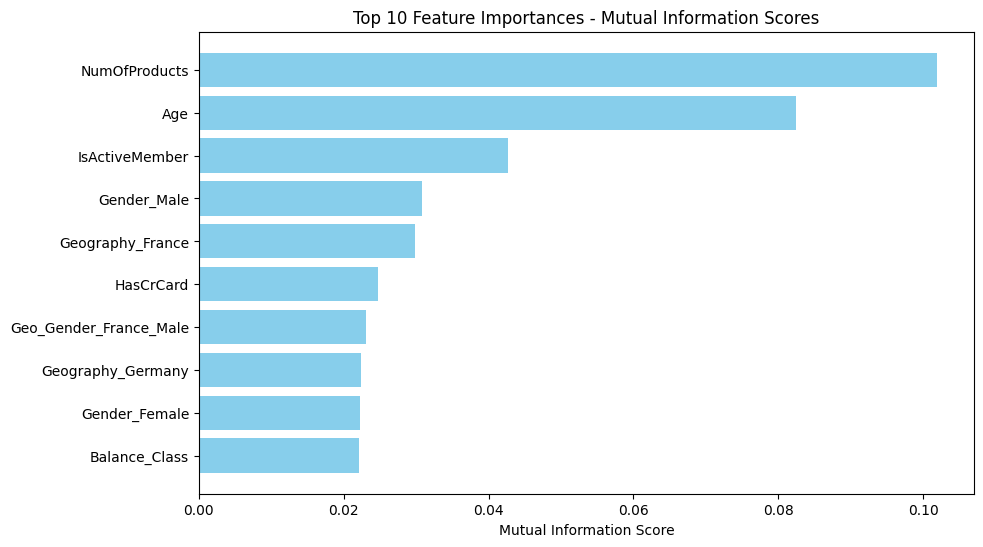

In [47]:
# Plotting the features

# Selecting the top 10 features
top_10_features = feature_scores_mi.head(10)

# Plotting the top 10 features in a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Mutual_Info_Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Top 10 Feature Importances - Mutual Information Scores')
plt.gca().invert_yaxis()  
plt.show()

## <font color='289C4E'>5.3.2. Models Classification 📳<font><a class='anchor' id='mcl'></a>

<u><b>RANDOMFOREST CLASSIFFIER</b></u>

In [48]:
# SelectFromModel feature importance

model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X, y)

feature_scores_sfm = SelectFromModel(model_rf, prefit=True)
feature_scores_sfm_index = feature_scores_sfm.get_support()

df_sfm = X.iloc[:, feature_scores_sfm_index]
df_sfm

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_Category_43-47,Age_Category_48-52
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,False,False
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,False,False
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,False,False
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,False,False
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,False,False
...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,False,False
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,False,False
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,False,False
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,False,False


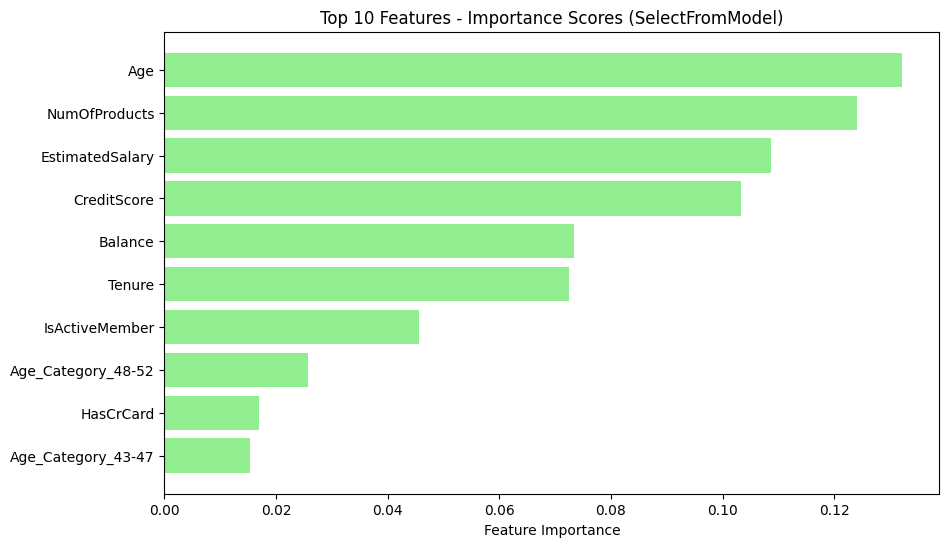

In [49]:
# Plot the first 10 features

selected_features = X.columns[feature_scores_sfm_index]

# Get feature importances and indices of the selected features
importances = model_rf.feature_importances_[feature_scores_sfm_index]
indices = (-importances).argsort()[:10] 

# Plot the first 10 features based on importance scores in descending order
plt.figure(figsize=(10, 6))
plt.barh(selected_features[indices], importances[indices], color='lightgreen')
plt.xlabel('Feature Importance')
plt.title('Top 10 Features - Importance Scores (SelectFromModel)')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()

In [50]:
# Select feature_importances from feature_importances_

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_tree = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df_tree = feature_importance_tree.sort_values(by='Importance', ascending=False)

feature_importance_df_tree

,Feature,Importance
1,Age,0.137645
4,NumOfProducts,0.124310
7,EstimatedSalary,0.106712
0,CreditScore,0.101394
3,Balance,0.072884
...,...,...
52,Age_Category_78-82,0.000113
56,Credit_Score_Range_350-399,0.000091
55,Credit_Score_Range_300-349,0.000038
54,Age_Category_88-92,0.000014


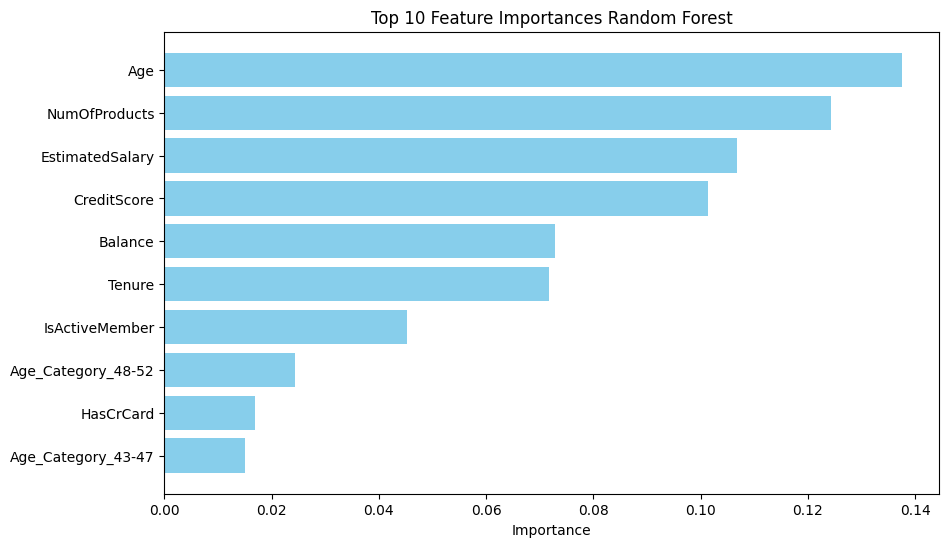

In [51]:
# Plotting the first 10 features horizontally
top_10_features = feature_importance_df_tree.head(10)  # Selecting the top 10 features

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'][::-1], top_10_features['Importance'][::-1], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances Random Forest')
plt.show()

<u><b>CASTBOOST CLASSIFFIER</b></u>

In [52]:
# Define the CatBoost model with AUC as the metric
model = cb.CatBoostClassifier(eval_metric='AUC',  
                              random_seed=42,
                              verbose=False)

# Create a Pool object for training and validation data
train_pool = Pool(X_train, label=y_train)

# Train the model
model.fit(train_pool)

# Get feature importance
feature_importance = model.get_feature_importance(train_pool)

# Print feature importance scores
for i, score in enumerate(feature_importance):
    print(f"Feature {i+1}: {score}")

Feature 1: 5.6793152521908175
Feature 2: 18.450493387235557
Feature 3: 3.1035100994502365
Feature 4: 8.165189664499689
Feature 5: 31.79294829528801
Feature 6: 1.182048891921575
Feature 7: 7.802069080680915
Feature 8: 4.245066584773305
Feature 9: 1.6312161655674415
Feature 10: 0.17404697253787746
Feature 11: 2.645953070003531
Feature 12: 0.24032982345669118
Feature 13: 0.6940770588719823
Feature 14: 1.4079835157722391
Feature 15: 0.3065496479636651
Feature 16: 1.1729705850541308
Feature 17: 1.8417693771983885
Feature 18: 0.49501234754403906
Feature 19: 0.250994063026302
Feature 20: 0.3167999237933423
Feature 21: 0.011904976008993198
Feature 22: 0.19061539900340135
Feature 23: 0.16683467491271423
Feature 24: 0.2532296554946347
Feature 25: 0.2247583888283064
Feature 26: 0.2738272395024785
Feature 27: 0.14358380732486528
Feature 28: 0.1692402505074724
Feature 29: 0.19381365147969845
Feature 30: 0.3128070854081306
Feature 31: 0.1792596001501057
Feature 32: 0.11195074141386642
Feature 33: 0.

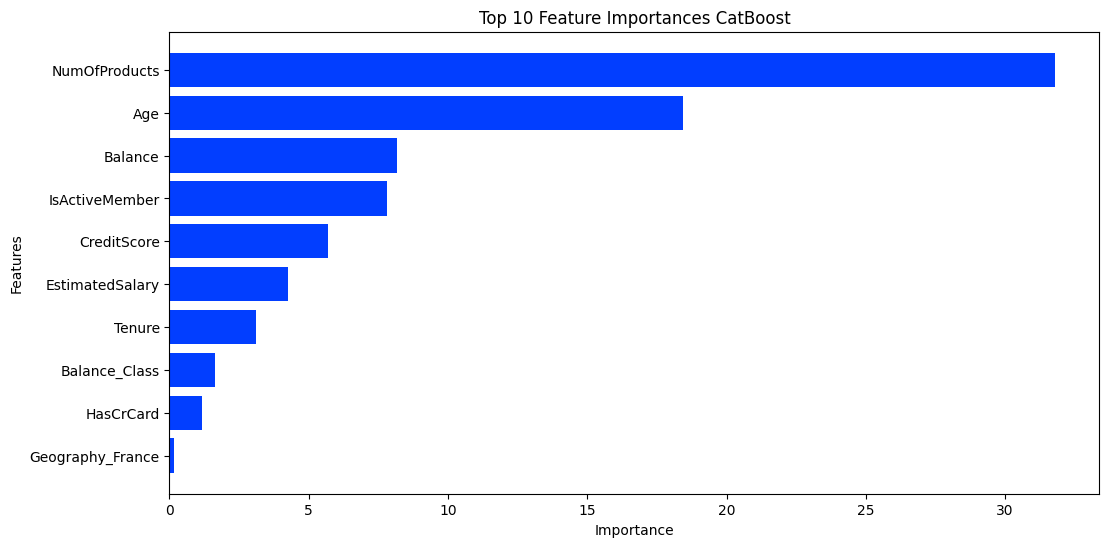

In [53]:
# Get feature importance of the 10 first features
feature_importance = model.feature_importances_[:10]  # Taking top 10 features
sorted_idx = np.argsort(feature_importance)

# Plotting feature importance
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Top 10 Feature Importances CatBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

<u><b>LIGHTGBM</b></u>

[LightGBM] [Info] Number of positive: 34909, number of negative: 130002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 964
[LightGBM] [Info] Number of data points in the train set: 164911, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211684 -> initscore=-1.314805
[LightGBM] [Info] Start training from score -1.314805


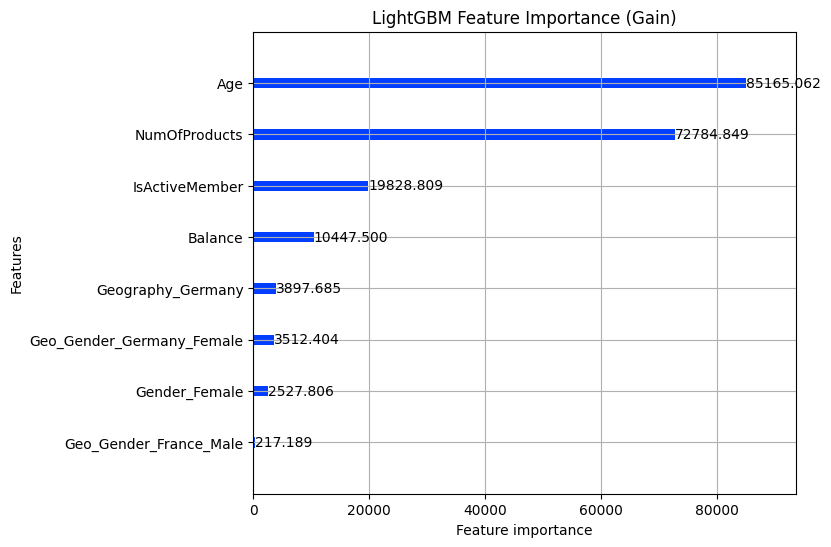

In [54]:
# Creating the dataframe 
train_data = lgb.Dataset(X, label = y)
params = {
    "objective": "binary",
    "metric": "binary_logloss",
}

model = lgb.train(params, train_data, num_boost_round=5)

# Plot feature importance using Gain
lgb.plot_importance(model, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

# <font color='289C4E'>6. Preprocessing 🪶<font><a class='anchor' id='prepro'></a>

In order to train our model we will perform some preprocessing steps in our features, mainly:

- RobustScaler on the numerical features with outliers
- MinMaxScaler on the other numerical features
- OneHotEncode on the categorical features

In [55]:
# Define the features you want to scale
features_robust = [
                   "CreditScore", 
                   "Age"]

features_minmax = [
                   "Tenure", 
                   'Balance', 
                   'NumOfProducts', 
                   'HasCrCard', 
                   'IsActiveMember', 
                   'EstimatedSalary'
                ]



# Define features and target
X = df.drop(columns=["Exited"])
y = df["Exited"]

X_cat = X.select_dtypes(include=['object'])
X_num = X.select_dtypes(exclude=['object'])

# Exclude columns not to be scaled
num_features_to_scale = [col for col in X_num.columns if col in features_robust or col in features_minmax]
cat_features  = X_cat.columns

# Column Transformer with the 2 scalers
scalers = ColumnTransformer([
    ("robust_scaler", RobustScaler(), features_robust),
    ("minmax_scaler", MinMaxScaler(), features_minmax)
], remainder='passthrough')

# Define the transformers for numerical and categorical features
num_transformer = make_pipeline(scalers)

cat_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)

# Create the preprocessor using `ColumnTransformer`
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features_to_scale),
        ('cat', cat_transformer, cat_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('columntransformer',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('robust_scaler',
                                                                                   RobustScaler(),
                                                                                   ['CreditScore',
                                                                                    'Age']),
                                                                                  ('minmax_scaler',
                                                                                   MinMaxScaler(),
                                                                                   ['Tenure',
                                                                                    'Balance',
                                                                                    'NumOfProducts',
                                                                                    'HasCrCard',
                                                                                    'IsActiveMember',
                                                                                    'EstimatedSalary'])]))]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Geography', 'Gender', 'Geo_Gender', 'Salary_Category', 'Age_Category',
       'Credit_Score_Range'],
      dtype='object'))])

# <font color='289C4E'>7. Modeling 📈<font><a class='anchor' id='mod'></a>

For the modeling we have chosen three approches in orther to assess the performance of the model:

- Asses the performance of baseline models and select the best ones
- Perform GridSearch over the best model
- Perform Voting Classifier selecting the best models

**Key Findings** 

- The model with the best performance is `LightGBM`, reaching an AUC of 0.88939

- Fine-tuning the LightGBM model with several hyperparameter do not show an improvement on the performance

- Combining the best 3 models `XGBClassifier`, `LGBMClassifier` and `CatBoostClassifier` show an slightly improvement in the performance reaching an AUC of 0.8905 although the FN/FP amount remains equal

# <font color='289C4E'>7.1. Baseline 📇<font><a class='anchor' id='base'></a>

Model Name: RandomForestClassifier
AUC-ROC Score: 0.8711


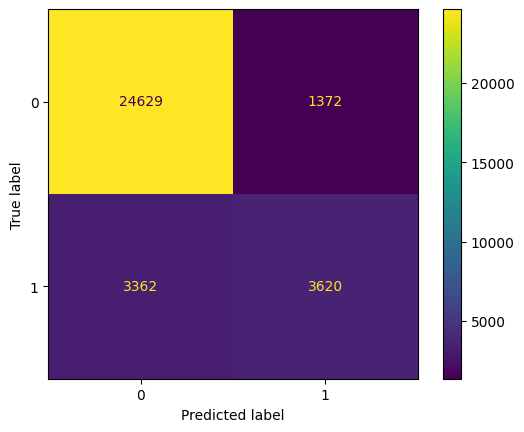

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26001
           1       0.73      0.52      0.60      6982

    accuracy                           0.86     32983
   macro avg       0.80      0.73      0.76     32983
weighted avg       0.85      0.86      0.85     32983



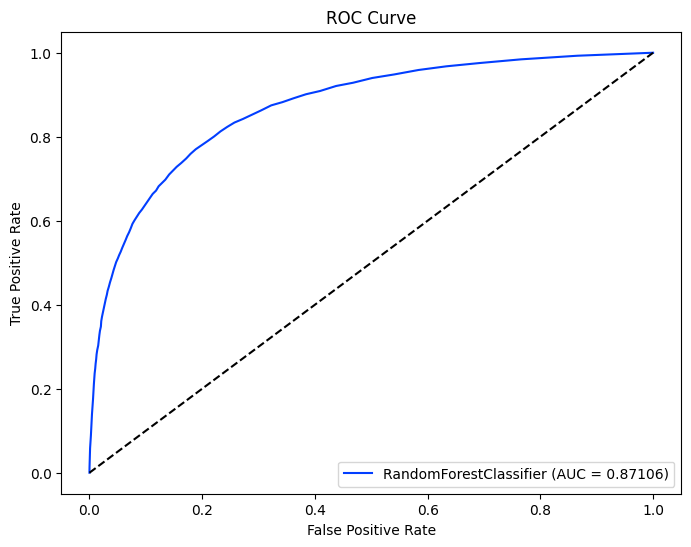

Model Name: AdaBoostClassifier
AUC-ROC Score: 0.8801


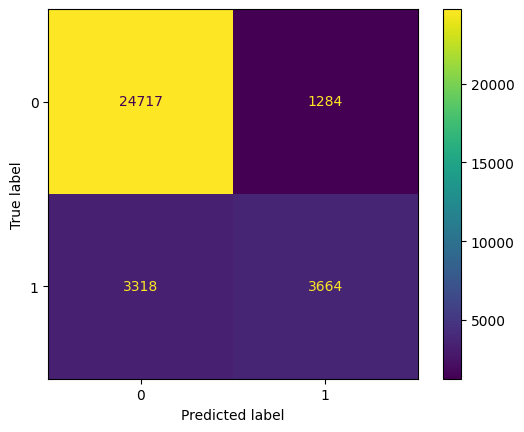

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26001
           1       0.74      0.52      0.61      6982

    accuracy                           0.86     32983
   macro avg       0.81      0.74      0.76     32983
weighted avg       0.85      0.86      0.85     32983



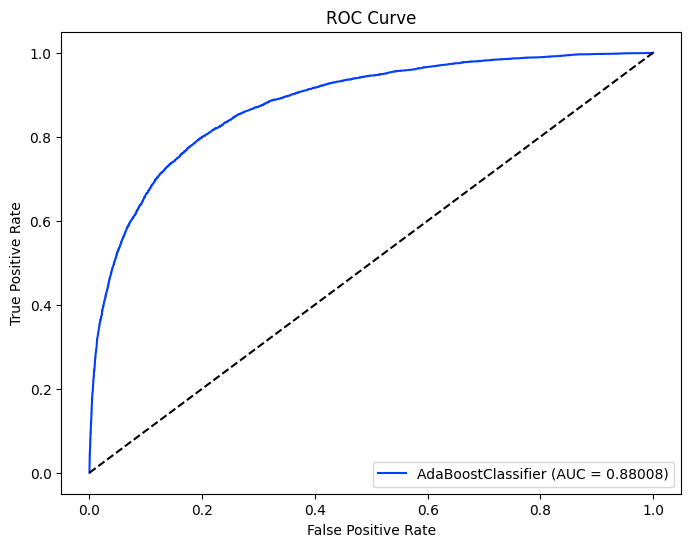

Model Name: GradientBoostingClassifier
AUC-ROC Score: 0.8883


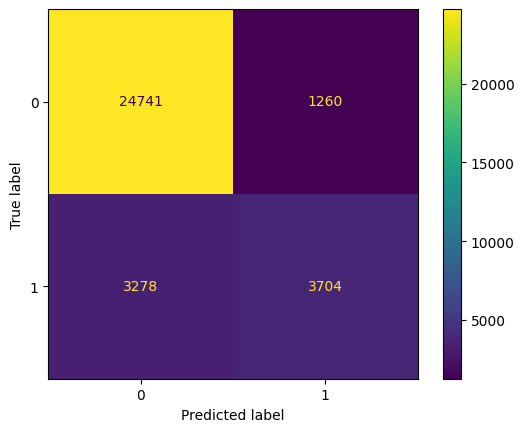

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     26001
           1       0.75      0.53      0.62      6982

    accuracy                           0.86     32983
   macro avg       0.81      0.74      0.77     32983
weighted avg       0.85      0.86      0.85     32983



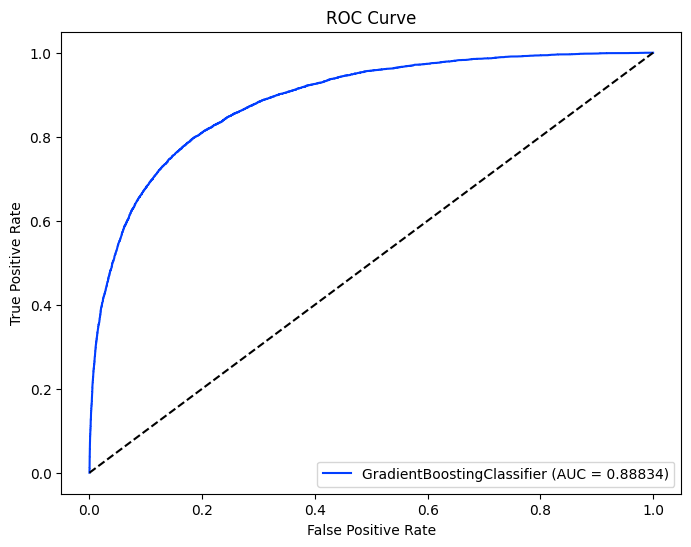

Model Name: XGBoostClassifier
AUC-ROC Score: 0.8886


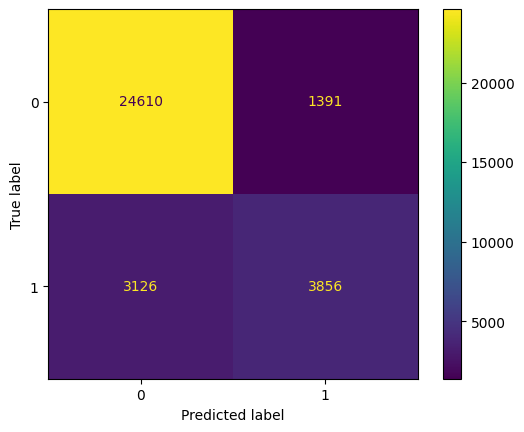

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26001
           1       0.73      0.55      0.63      6982

    accuracy                           0.86     32983
   macro avg       0.81      0.75      0.77     32983
weighted avg       0.86      0.86      0.86     32983



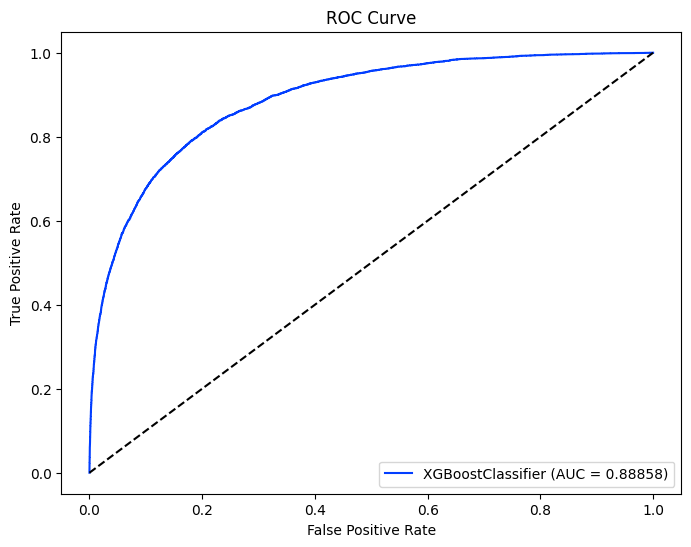

[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Info] Number of positive: 27927, number of negative: 104001
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 131928, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211684 -> initscore=-1.314807
[LightGBM] [Info] Start training from score -1.314807
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] Unknown parameter: class_weights
Model Name: LGBMClassifier
AUC-ROC Score: 0.8894


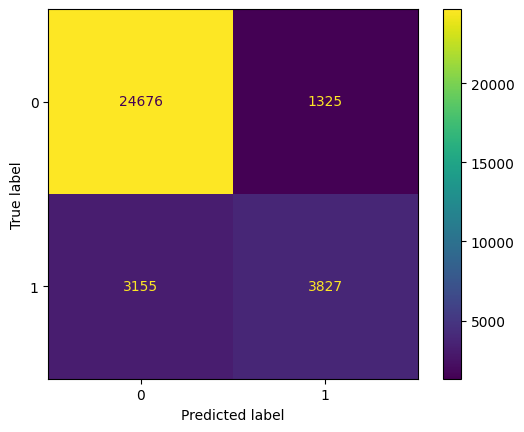

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26001
           1       0.74      0.55      0.63      6982

    accuracy                           0.86     32983
   macro avg       0.81      0.75      0.77     32983
weighted avg       0.86      0.86      0.86     32983



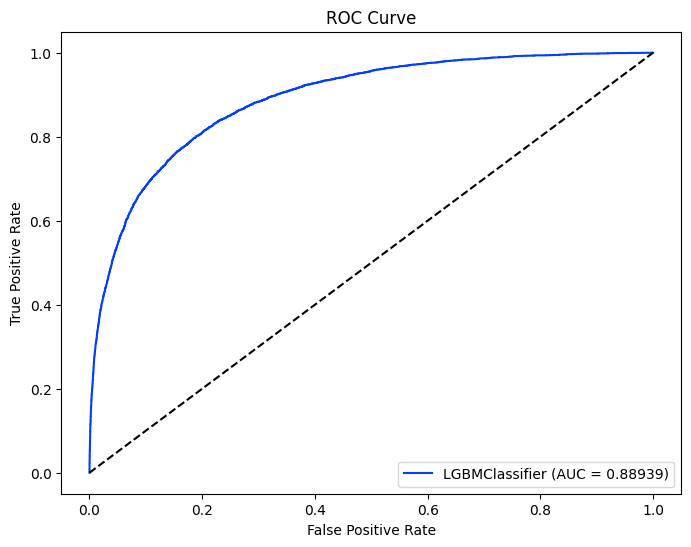

Model Name: CatBoostClassifier
AUC-ROC Score: 0.8887


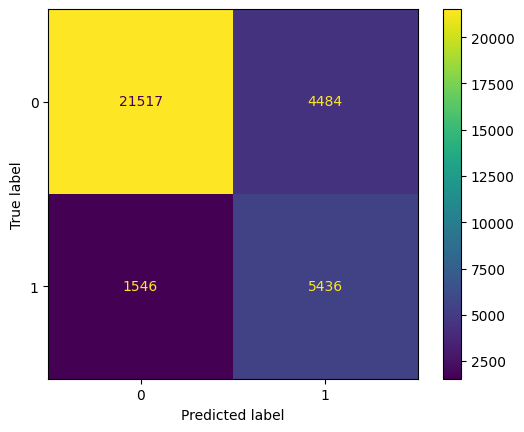

              precision    recall  f1-score   support

           0       0.93      0.83      0.88     26001
           1       0.55      0.78      0.64      6982

    accuracy                           0.82     32983
   macro avg       0.74      0.80      0.76     32983
weighted avg       0.85      0.82      0.83     32983



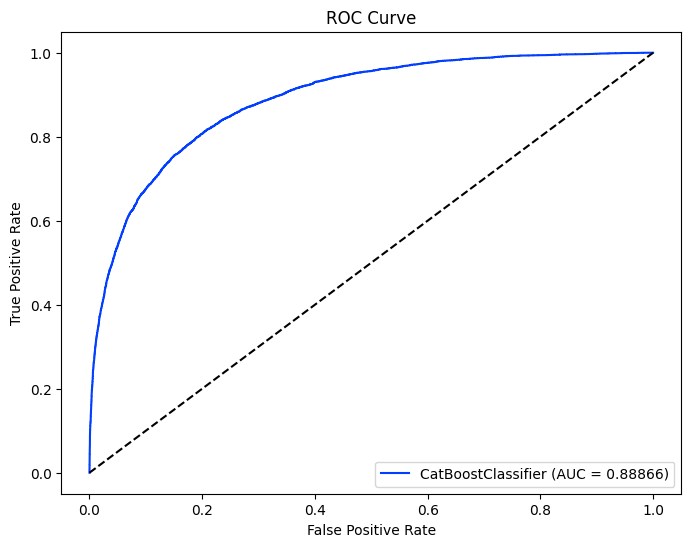

[LightGBM] [Warning] Unknown parameter: class_weights
Predicted Probabilities of the Best Model:
[0.10207789 0.18541004 0.19173877 ... 0.04028725 0.06824479 0.10081615]


In [56]:
# Train/Test Split
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

# Make pipeline
def df_classification_models(classifier):
    
    piped_regressor = make_pipeline(preprocessor, classifier)

    return piped_regressor

# Balance the labels
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# List of model names
models_names = [

    "RandomForestClassifier",
    "AdaBoostClassifier",
    "GradientBoostingClassifier",
    "XGBoostClassifier",
    "LGBMClassifier",  
    "CatBoostClassifier",  
]

models = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(class_weights=class_weights),
    LGBMClassifier(class_weights=class_weights),  
    CatBoostClassifier(verbose=False, class_weights=class_weights),  
]

# models = [
# #     BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(), sampling_strategy='auto', n_estimators=10, random_state=42),
# #     BalancedBaggingClassifier(base_estimator=RandomForestClassifier(), sampling_strategy='auto', n_estimators=10, random_state=42),
# #     BalancedBaggingClassifier(base_estimator=AdaBoostClassifier(), sampling_strategy='auto', n_estimators=10, random_state=42),
# #     BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(), sampling_strategy='auto', n_estimators=10, random_state=42),
# #     BalancedBaggingClassifier(base_estimator=XGBClassifier(), sampling_strategy='auto', n_estimators=10, random_state=42),
# #     BalancedBaggingClassifier(base_estimator=LGBMClassifier(), sampling_strategy='auto', n_estimators=10, random_state=42),
# #     BalancedBaggingClassifier(base_estimator=CatBoostClassifier(verbose=False), sampling_strategy='auto', n_estimators=10, random_state=42),

# ]

# Lists to store the models and their corresponding AUC-ROC scores
trained_models = []
auc_roc_scores = []


# Lists to store the accuracy and confusion matrix for each model
different_accuracies = []
confusion_matrices = []

for model_name, model in zip(models_names, models):
    # Create the model pipeline
    temp_piped_classifier = df_classification_models(model)

    # Fit the model on the training data
    temp_piped_classifier.fit(X_train, y_train)

    # Save the trained model in a list
    trained_models.append(temp_piped_classifier)
    
    # Predict on the test data
    y_pred = temp_piped_classifier.predict(X_test)
    y_pred_prob = temp_piped_classifier.predict_proba(X_test)[:, 1]  # Probabilities for positive class
    
    
    # Compute AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    auc_roc_scores.append(auc_roc)

    print(f'Model Name: {model_name}')
    print(f'AUC-ROC Score: {auc_roc:.4f}')      
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_plot =ConfusionMatrixDisplay(confusion_matrix=cm)

    cm_plot.plot()
    plt.show()
    
    # Converting probabilities to classes (assuming a threshold)
    y_pred_classes = (y_pred > 0.2).astype(int)

    # Printing the classification report
    print(classification_report(y_test, y_pred_classes))
    
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_roc:.5f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    
# Identify the best model based on the AUC-ROC score
best_model_index = np.argmax(auc_roc_scores)
best_model = trained_models[best_model_index]

# Use the best model to predict probabilities on the test data
best_model_probabilities = best_model.predict_proba(X_test)[:, 1]
print("Predicted Probabilities of the Best Model:")
print(best_model_probabilities)

In [57]:
# Find the best classes threshold

step_factor = 0.01 
threshold_value = 0.1 
roc_score=0
predicted_proba = best_model.predict_proba(X_test)  #probability of prediction

while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',temp_thresh,'--',roc_auc_score(y_test, predicted))
    if roc_score<roc_auc_score(y_test, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',roc_score)

[LightGBM] [Warning] Unknown parameter: class_weights
Threshold 0.1 -- 0.7756587287682379
Threshold 0.11 -- 0.7825512263806789
Threshold 0.12 -- 0.7881983881566548
Threshold 0.13 -- 0.7928535866748443
Threshold 0.14 -- 0.7962183736383406
Threshold 0.15000000000000002 -- 0.7990593337137917
Threshold 0.16000000000000003 -- 0.8018286810708237
Threshold 0.17000000000000004 -- 0.8040310510279275
Threshold 0.18000000000000005 -- 0.8050153134603344
Threshold 0.19000000000000006 -- 0.8050049217528387
Threshold 0.20000000000000007 -- 0.8053333636078228
Threshold 0.21000000000000008 -- 0.8050649832331879
Threshold 0.22000000000000008 -- 0.804307236888659
Threshold 0.2300000000000001 -- 0.8043233078171607
Threshold 0.2400000000000001 -- 0.8040522365604098
Threshold 0.2500000000000001 -- 0.8028309699346006
Threshold 0.2600000000000001 -- 0.8020426874488036
Threshold 0.27000000000000013 -- 0.7995615454095694
Threshold 0.28000000000000014 -- 0.7988077238419238
Threshold 0.29000000000000015 -- 0.7977

# <font color='289C4E'>7.2. GridSearch 🎞️<font><a class='anchor' id='grid'></a>

[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Info] Number of positive: 22342, number of negative: 83200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 105542, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211688 -> initscore=-1.314779
[LightGBM] [Info] Start training from score -1.314779
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Warning] Unknown parameter: class_weights
[LightGBM] [Info] Number of positive: 22341, number of negative: 83201
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001435 second

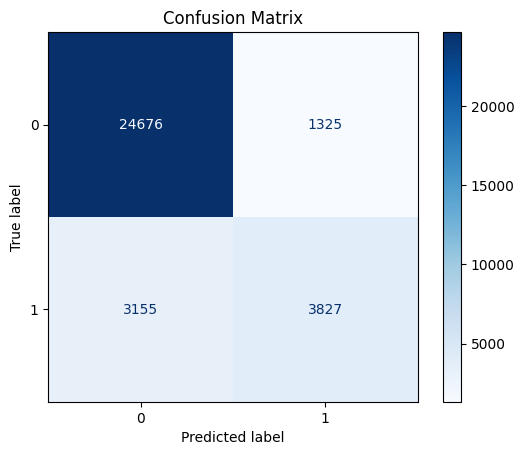

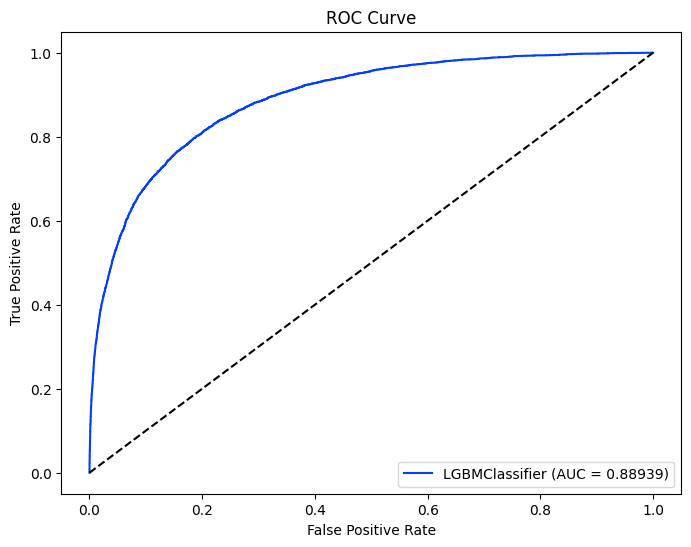

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26001
           1       0.74      0.55      0.63      6982

    accuracy                           0.86     32983
   macro avg       0.81      0.75      0.77     32983
weighted avg       0.86      0.86      0.86     32983



In [58]:
# Train/Test Split
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

# Define the parameter grid for LGBMClassifier
param_grid_lgbm = {
    'lgbmclassifier__n_estimators': [80, 100],
    'lgbmclassifier__learning_rate': [0.01],
#     'lgbmclassifier__max_depth': [-1, 1, 3, 5, 15],
    'lgbmclassifier__reg_alpha': [3],
    'lgbmclassifier__reg_lambda': [0, 1, 2, 3],
#     'lgbmclassifier__boosting_type': ['gbdt'],
#     'lgbmclassifier__num_leaves': [10, 20, 30, 40]
}

clf = LGBMClassifier(class_weights='balanced')

pipeline = make_pipeline(preprocessor, clf)

grid_search_lgbm = GridSearchCV(
    estimator=pipeline,
    param_grid= param_grid_lgbm,
    scoring='roc_auc',
    cv=5,
    error_score='raise'
)

# Fit the grid search to the training data for LGBMClassifier
grid_search_lgbm.fit(X_train, y_train)

# Get the best parameters and best score for LGBMClassifier
best_params_lgbm = grid_search_lgbm.best_params_
best_score_lgbm = grid_search_lgbm.best_score_

print("Best Parameters for LGBMClassifier:", best_params_lgbm)
print("Best AUC-ROC Score for LGBMClassifier:", best_score_lgbm)

# Now, create the final LGBMClassifier model with the best parameters
final_lgbm = LGBMClassifier(**best_params_lgbm)

# Create the model pipeline with the final LGBMClassifier
final_model = make_pipeline(preprocessor, final_lgbm)

# Fit the final model on the training data
final_model.fit(X_train, y_train)

# Predict on the test data using the final model
y_pred = final_model.predict(X_test)
y_pred_prob = final_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
auc_roc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC Score on Test Data: {auc_roc:.4f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LGBMClassifier (AUC = {auc_roc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

In [59]:
print("Best Parameters for LGBMClassifier:", grid_search_lgbm.best_params_)

Best Parameters for LGBMClassifier: {'lgbmclassifier__learning_rate': 0.01, 'lgbmclassifier__n_estimators': 100, 'lgbmclassifier__reg_alpha': 3, 'lgbmclassifier__reg_lambda': 1}


# <font color='289C4E'>7.3. Voting Classifier 🎞️<font><a class='anchor' id='vot'></a>

[LightGBM] [Info] Number of positive: 27927, number of negative: 104001
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 131928, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Model Name: Voting Classifier (CatBoost + LGBM)
AUC-ROC Score: 0.8904


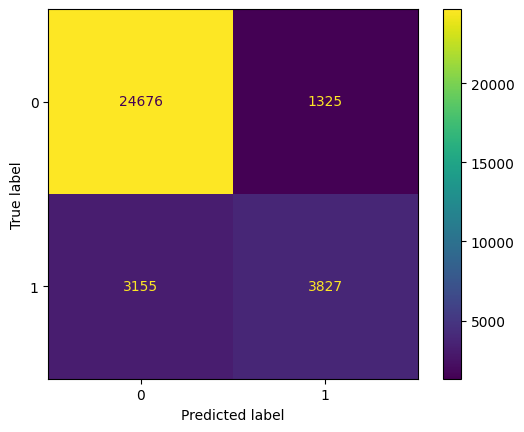

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26001
           1       0.74      0.55      0.63      6982

    accuracy                           0.86     32983
   macro avg       0.81      0.75      0.77     32983
weighted avg       0.86      0.86      0.86     32983



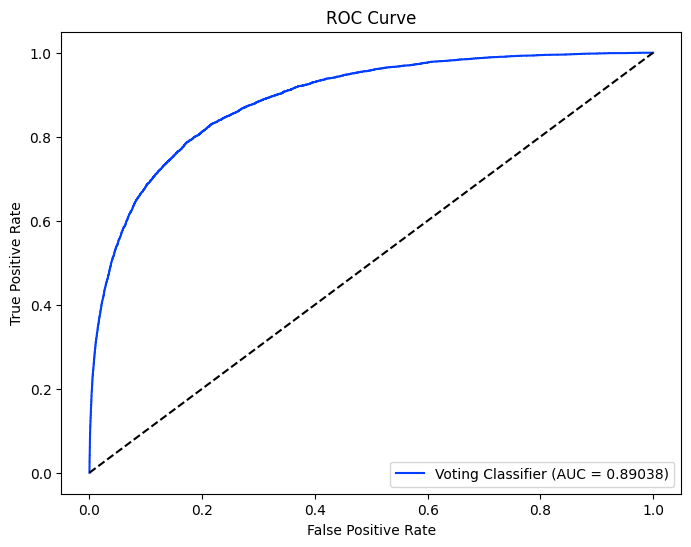

In [60]:
# Train/Test Split
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

# Balance the labels
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create individual classifiers
catboost_classifier = CatBoostClassifier(verbose=False, class_weights=class_weights)
lgbm_classifier = LGBMClassifier(class_weight='balanced')
xgboost_classifier = XGBClassifier(class_weights='balanced')

# Create a VotingClassifier with 'soft' voting (probability weights)
voting_classifier = VotingClassifier(estimators=[
    ('xgboost', xgboost_classifier),
    ('catboost', catboost_classifier),
    ('lgbm', lgbm_classifier)
], voting='soft')

# Make pipeline
def df_classification_models(classifier):
    piped_classifier = make_pipeline(preprocessor, classifier)
    return piped_classifier


# Train and evaluate the ensemble model
best_model = df_classification_models(voting_classifier)
best_model.fit(X_train, y_train)

# Predict on the test data
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Compute AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
auc_roc_scores.append(auc_roc)

print(f'Model Name: Voting Classifier (CatBoost + LGBM)')
print(f'AUC-ROC Score: {auc_roc:.4f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_plot =ConfusionMatrixDisplay(confusion_matrix=cm)

cm_plot.plot()
plt.show()

# Converting probabilities to classes (assuming a threshold)
y_pred_classes = (y_pred > 0.5).astype(int)

# Printing the classification report
print(classification_report(y_test, y_pred_classes))

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Voting Classifier (AUC = {auc_roc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# <font color='289C4E'>8. Submission 🪙<font><a class='anchor' id='sub'></a>

In [61]:
# Import test data

test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
test.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/playground-series-s4e1/test.csv'

In [ ]:
# Drop columns

test_df = test.drop(columns = ['id', 'Surname', 'CustomerId'], axis=1)

In [ ]:
# Transform the dataframe

transformer = DataTransformer(test_df)
test_df = transformer.transform_all()

In [ ]:
# Create a DataFrame to store the submission

test_prediction = best_model.predict_proba(test_df)[:, 1]  # Probabilities for positive class

In [ ]:
# Create a DataFrame to store the submission
submission_df = test[["id"]].copy()

# Add the formatted predictions to the submission DataFrame
submission_df["Exited"] = test_prediction.squeeze()

# Save Submission
submission_df.to_csv('submission.csv',index=False)

# Display the first 2 rows of the submission DataFrame
submission_df.head()

,id,Exited
0,165034,0.085674
1,165035,0.901722
2,165036,0.060062
3,165037,0.441881
4,165038,0.501538
